# Country Development Analysis

**Names**: Krishna Srinivasa Desikan, Manish Kumar, Sagar Katiyar



## 1. Introduction and Dataset Research

### Introduction:

The data we use contains records collected on different countries from 1980 - 2013 from the World Bank. Included is different data about urban development, agriculture and rural development, health, and infrastructure. We will only consider the year 2013 for the purposes of our project, since this is the latest data we have. This data is already cleaned and preprocessed.

### Motivation:

First let us jot down the research questions we have for this dataset and then talk about why we even need to ask these:

1. Can countries be clustered based on 'development' in our dataset?
2. How many clusters present itself?
3. What are the different features of these clusters? (is one higher/lower in a certain metric)

The motivation of this project is to be able to get clusters of countries with similar indices of 'development' This development is quanitifed through the differnt features in our dataset, like life expectancy and death rate. Suppose we were the UN, IMF or the World Bank. The primary motivation of such an establishment with the results of our project is **resource allocation**.

The World Bank for example has the [International Development Association](https://ida.worldbank.org/en/ida) which is interested in seeing which countries need the most aid in order to 'develop' more as a country and to enable people to escape poverty. The way they determine these countries could be through this project itself. We can group the countries together in order for an entity like the world bank to allocate resources and aid.**[1]**

Similarly, the IMF gives aid to countries in the form of SDR's the IMF defines SDRs as follows:
    "It supplements countries’ reserves, using the collective strength of the Fund’s membership to make all 190 member countries a little stronger. It would provide liquidity support to many developing and low-income countries that are struggling, allowing them to pay for healthcare and support vulnerable people"
    
The IMF could determine which countries may need an SDR based on countries grouped together in our project based on development. As the mention, developing countries may need it more than the others. So such a clustering can be benefical in determining which countries are in need the most. Again this is the same principle of resrouce allocation.**[2]**

The last need for such a task of unsupervised learning on this dataset, is with the UN. The UN also does its own analysis on aid allocation by donors. The UN could be motivated to look at various clusters of countries with similar development index, and accordinlgy determine if allocation of aid is proportional to development, or disproportiontly favors already developed nations.**[3]**

### Resources Cited
[1] https://ida.worldbank.org/en/financing/resource-management/ida-resource-allocation-index

[2] https://www.imf.org/en/Topics/special-drawing-right/seven-things-you-need-to-know-about-sdr-allocations

[3] https://www.un.org/en/ecosoc/docs/pdfs/aid_allocation_1.pdf

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score

In [4]:
df = pd.read_csv('global_development.csv')
df = df[df.Year == 2013]
df

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Health.Total Population,...,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land,Data.Rural Development.Arable Land Percent,Data.Rural Development.Land Area,Data.Rural Development.Rural Population,Data.Rural Development.Rural Population Growth,Data.Rural Development.Surface Area,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth
33,Canada,2013,11.000000,7.200000,1.610000,83.441000,79.140000,81.238049,1.191184,34754312.0,...,7.186004,1.321131,5.049205,9093510.0,6501489,0.244165,9984670.0,3.821881,81.293000,1.410386
67,Sao Tome and Principe,2013,34.742000,6.919000,4.145000,68.156000,64.210000,66.134878,2.651021,188098.0,...,51.770833,0.046252,9.062500,960.0,69098,0.857526,960.0,195.935417,63.265000,3.707378
101,Lao PDR,2013,27.272000,6.092000,3.108000,69.195000,66.483000,67.805927,1.891325,6645827.0,...,10.697574,0.218182,6.282496,230800.0,4295331,0.179355,236800.0,28.794744,35.368000,5.097592
135,Arab World,2013,25.853504,5.947998,3.233402,71.898085,68.126502,69.949702,2.063874,362466629.0,...,38.312828,0.161818,4.305996,13621401.0,155668158,1.369418,13152828.5,26.610084,57.053106,2.592937
169,Latin America & Caribbean (all income levels),2013,18.043066,5.890156,2.183411,77.836767,71.593453,74.638654,1.127505,608545904.0,...,37.377695,0.275778,8.370902,20041644.4,127901758,-0.192879,20425332.4,30.364071,78.981328,1.484795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,High income: nonOECD,2013,13.821535,9.970351,1.765720,77.329525,68.917341,73.442825,0.758121,249927994.0,...,20.818122,0.522272,6.554736,19849434.3,51805867,0.141454,20583220.3,12.591190,77.141281,0.996497
6323,Greece,2013,9.000000,10.500000,1.340000,83.400000,78.000000,80.634146,-0.274055,11092771.0,...,63.304888,0.228978,19.705198,128900.0,2551337,-1.788609,131960.0,86.057184,77.000000,0.182830
6357,Paraguay,2013,23.922000,5.677000,2.897000,74.473000,70.023000,72.193732,1.723422,6687361.0,...,54.115278,0.659453,11.099924,397300.0,2745830,1.174495,406752.0,16.832019,58.940000,2.107615
6391,Botswana,2013,23.807000,17.145000,2.665000,46.268000,47.679000,46.990707,0.862480,2003910.0,...,45.677836,0.142222,0.502885,566730.0,867713,0.328065,581730.0,3.535917,56.699000,1.272544


## Dataset Claning 

In [5]:
df.columns, df.Country.unique()

(Index(['Country', 'Year', 'Data.Health.Birth Rate', 'Data.Health.Death Rate',
        'Data.Health.Fertility Rate',
        'Data.Health.Life Expectancy at Birth, Female',
        'Data.Health.Life Expectancy at Birth, Male',
        'Data.Health.Life Expectancy at Birth, Total',
        'Data.Health.Population Growth', 'Data.Health.Total Population',
        'Data.Infrastructure.Mobile Cellular Subscriptions',
        'Data.Infrastructure.Mobile Cellular Subscriptions per 100 People',
        'Data.Infrastructure.Telephone Lines',
        'Data.Infrastructure.Telephone Lines per 100 People',
        'Data.Rural Development.Agricultural Land',
        'Data.Rural Development.Agricultural Land Percent',
        'Data.Rural Development.Arable Land',
        'Data.Rural Development.Arable Land Percent',
        'Data.Rural Development.Land Area',
        'Data.Rural Development.Rural Population',
        'Data.Rural Development.Rural Population Growth',
        'Data.Rural Development.Su

### Removing Columns

We decide to remove some columns that may not be relevant to our analysis of these countries, we also want to limit the dimensions and number of features that we utilize. Initially I thought I would drop the country values that encompassed groups of countries (world, arab world, low and middle income....) however I thought it would make for interesting analysis to see where they lie in each cluster.

In [6]:
df = df.drop(['Data.Health.Total Population','Data.Infrastructure.Mobile Cellular Subscriptions', 'Data.Rural Development.Agricultural Land',
             'Data.Rural Development.Arable Land', 'Data.Rural Development.Land Area','Data.Rural Development.Rural Population', 'Data.Rural Development.Surface Area'], axis = 1)

###df = df[(df.Country != 'High income: nonOECD') & (df.Country != 'Heavily indebted poor countries (HIPC)') & (df.Country != 'Sub-Saharan Africa (developing only)')& (df.Country != 'Least developed countries: UN classification') & (df.Country != 'High income: OECD') & (df.Country != 'Lower middle income') & (df.Country != 'Fragile and conflict affected situations')& (df.Country != 'East Asia & Pacific (developing only)') & (df.Country != 'Latin America & Caribbean (developing only)')&(df.Country != 'Low & middle income')& (df.Country != 'East Asia & Pacific (all income levels)') & (df.Country != 'Middle East & North Africa (all income levels)')&(df.Country != 'World') & (df.Country != 'South Asia') & (df.Country != 'Latin America & Caribbean (all income levels)') &(df.Country != 'Arab World')]
df

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth
33,Canada,2013,11.000000,7.200000,1.610000,83.441000,79.140000,81.238049,1.191184,80.050464,17647000.0,50.654490,7.186004,5.049205,0.244165,3.821881,81.293000,1.410386
67,Sao Tome and Principe,2013,34.742000,6.919000,4.145000,68.156000,64.210000,66.134878,2.651021,64.951249,8035.0,4.271709,51.770833,9.062500,0.857526,195.935417,63.265000,3.707378
101,Lao PDR,2013,27.272000,6.092000,3.108000,69.195000,66.483000,67.805927,1.891325,64.702256,450000.0,6.771166,10.697574,6.282496,0.179355,28.794744,35.368000,5.097592
135,Arab World,2013,25.853504,5.947998,3.233402,71.898085,68.126502,69.949702,2.063874,105.040566,34786428.0,9.574076,38.312828,4.305996,1.369418,26.610084,57.053106,2.592937
169,Latin America & Caribbean (all income levels),2013,18.043066,5.890156,2.183411,77.836767,71.593453,74.638654,1.127505,109.435113,110192326.0,18.110476,37.377695,8.370902,-0.192879,30.364071,78.981328,1.484795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,High income: nonOECD,2013,13.821535,9.970351,1.765720,77.329525,68.917341,73.442825,0.758121,149.317712,79399332.0,31.806157,20.818122,6.554736,0.141454,12.591190,77.141281,0.996497
6323,Greece,2013,9.000000,10.500000,1.340000,83.400000,78.000000,80.634146,-0.274055,120.096302,5461193.0,49.090968,63.304888,19.705198,-1.788609,86.057184,77.000000,0.182830
6357,Paraguay,2013,23.922000,5.677000,2.897000,74.473000,70.023000,72.193732,1.723422,101.590194,410988.0,6.145743,54.115278,11.099924,1.174495,16.832019,58.940000,2.107615
6391,Botswana,2013,23.807000,17.145000,2.665000,46.268000,47.679000,46.990707,0.862480,153.785649,160488.0,8.008743,45.677836,0.502885,0.328065,3.535917,56.699000,1.272544


In [7]:
### Checking 0s by column
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Country  is :  0
Count of zeros in column  Year  is :  0
Count of zeros in column  Data.Health.Birth Rate  is :  0
Count of zeros in column  Data.Health.Death Rate  is :  0
Count of zeros in column  Data.Health.Fertility Rate  is :  0
Count of zeros in column  Data.Health.Life Expectancy at Birth, Female  is :  0
Count of zeros in column  Data.Health.Life Expectancy at Birth, Male  is :  0
Count of zeros in column  Data.Health.Life Expectancy at Birth, Total  is :  0
Count of zeros in column  Data.Health.Population Growth  is :  0
Count of zeros in column  Data.Infrastructure.Mobile Cellular Subscriptions per 100 People  is :  0
Count of zeros in column  Data.Infrastructure.Telephone Lines  is :  1
Count of zeros in column  Data.Infrastructure.Telephone Lines per 100 People  is :  1
Count of zeros in column  Data.Rural Development.Agricultural Land Percent  is :  0
Count of zeros in column  Data.Rural Development.Arable Land Percent  is :  0
Count of zeros in 

In [8]:
X=df.copy().drop(['Country'], axis=1)
X.head()

,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth
33,2013,11.000000,7.200000,1.610000,83.441000,79.140000,81.238049,1.191184,80.050464,17647000.0,50.654490,7.186004,5.049205,0.244165,3.821881,81.293000,1.410386
67,2013,34.742000,6.919000,4.145000,68.156000,64.210000,66.134878,2.651021,64.951249,8035.0,4.271709,51.770833,9.062500,0.857526,195.935417,63.265000,3.707378
101,2013,27.272000,6.092000,3.108000,69.195000,66.483000,67.805927,1.891325,64.702256,450000.0,6.771166,10.697574,6.282496,0.179355,28.794744,35.368000,5.097592
135,2013,25.853504,5.947998,3.233402,71.898085,68.126502,69.949702,2.063874,105.040566,34786428.0,9.574076,38.312828,4.305996,1.369418,26.610084,57.053106,2.592937
169,2013,18.043066,5.890156,2.183411,77.836767,71.593453,74.638654,1.127505,109.435113,110192326.0,18.110476,37.377695,8.370902,-0.192879,30.364071,78.981328,1.484795


### Scaling decisions

Looking at some basic summary statistics for each of the numerical attributes below, we can see that the scale of some attributes (Telephones lines ) is much larger than the scale of other attributes like fertility rate. Because the euclidean distance is used  in the creation of the t-SNE plots and our hierarchical clustering algorithms that we will be using on this dataset, this suggests that the larger scale attributes will dominate our results.

For this reason we standardize and scale

In [9]:
X.describe()

,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth
count,175.0,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2013.0,22.896037,8.116654,2.987276,71.883910,67.656344,69.720447,1.524083,93.433554,3.999136e+07,16.695891,38.816651,13.670917,0.433939,186.172354,56.265584,2.251510
std,0.0,10.664358,3.107488,1.438686,10.271862,9.026118,9.605274,1.265342,39.210524,1.376037e+08,16.677115,21.002480,12.903828,1.721324,607.070918,22.992253,1.753226
min,2013.0,8.200000,1.042000,1.280000,45.516000,45.151000,45.329049,-1.691349,6.865029,0.000000e+00,0.000000,0.532051,0.086281,-7.966836,1.800049,8.795000,-2.692118
25%,2013.0,14.077500,5.970999,1.866952,63.339205,60.179000,61.741338,0.723275,65.173017,1.062580e+05,2.259606,22.014594,3.910868,-0.288068,29.647897,37.866000,0.934562
50%,2013.0,20.823000,7.716000,2.468951,75.388000,70.152000,72.610341,1.447652,97.377753,7.975010e+05,10.985586,38.839860,10.174419,0.683962,71.568895,56.218000,2.134686
75%,2013.0,31.522000,9.681048,4.003177,79.666000,74.461000,76.852695,2.355368,119.890924,7.415376e+06,23.452769,53.415003,19.056713,1.568126,157.233368,76.502000,3.435009
max,2013.0,49.808000,17.411000,7.574000,86.410000,81.600000,83.096098,9.131984,187.403117,1.179047e+09,62.052120,87.184322,58.961358,6.999152,7589.142857,100.000000,9.807427


X will be the scaled dataframe of just numerical variables that we designate for all algorithms. 

In [10]:
X_stand=StandardScaler().fit_transform(X)
X_stand

array([[ 0.        , -1.11869568, -0.29582876, ..., -0.30123946,
         1.09163861, -0.48113465],
       [ 0.        ,  1.11398681, -0.38651497, ...,  0.01612839,
         0.30529851,  0.83277593],
       [ 0.        ,  0.41151279, -0.65340996, ..., -0.25998477,
        -0.91150479,  1.62799758],
       ...,
       [ 0.        ,  0.09648094, -0.78734154, ..., -0.27974697,
         0.11665191, -0.08231003],
       [ 0.        ,  0.08566641,  2.91368838, ..., -0.30171187,
         0.01890461, -0.55998211],
       [ 0.        ,  1.41328568,  0.7394601 , ..., -0.25269597,
        -1.00933229,  1.04748995]])

In [11]:
X=pd.DataFrame(X_stand, columns=X.columns)
X.head()

,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth
0,0.0,-1.118696,-0.295829,-0.960062,1.128350,1.275920,1.202532,-0.263844,-0.342293,-0.162848,2.042082,-1.510365,-0.670069,-0.110565,-0.301239,1.091639,-0.481135
1,0.0,1.113987,-0.386515,0.807018,-0.363966,-0.382915,-0.374363,0.893175,-0.728479,-0.291402,-0.747122,0.618563,-0.358160,0.246789,0.016128,0.305299,0.832776
2,0.0,0.411513,-0.653410,0.084153,-0.262526,-0.130367,-0.199892,0.291065,-0.734847,-0.288181,-0.596818,-1.342687,-0.574219,-0.148324,-0.259985,-0.911505,1.627998
3,0.0,0.278118,-0.699883,0.171568,0.001384,0.052238,0.023936,0.427821,0.296867,-0.037934,-0.428267,-0.024058,-0.727830,0.545025,-0.263594,0.034350,0.195301
4,0.0,-0.456370,-0.718550,-0.560353,0.581193,0.437442,0.513501,-0.314315,0.409264,0.511632,0.085065,-0.068710,-0.411911,-0.365194,-0.257392,0.990809,-0.438572


df_stand will be our scaled dataframe that we will add other relevant variables to that we create in the rest of the analysis.

In [12]:
df_stand=X.copy()
df_stand['country']=list(df['Country'])
df_stand.head()

,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,country
0,0.0,-1.118696,-0.295829,-0.960062,1.128350,1.275920,1.202532,-0.263844,-0.342293,-0.162848,2.042082,-1.510365,-0.670069,-0.110565,-0.301239,1.091639,-0.481135,Canada
1,0.0,1.113987,-0.386515,0.807018,-0.363966,-0.382915,-0.374363,0.893175,-0.728479,-0.291402,-0.747122,0.618563,-0.358160,0.246789,0.016128,0.305299,0.832776,Sao Tome and Principe
2,0.0,0.411513,-0.653410,0.084153,-0.262526,-0.130367,-0.199892,0.291065,-0.734847,-0.288181,-0.596818,-1.342687,-0.574219,-0.148324,-0.259985,-0.911505,1.627998,Lao PDR
3,0.0,0.278118,-0.699883,0.171568,0.001384,0.052238,0.023936,0.427821,0.296867,-0.037934,-0.428267,-0.024058,-0.727830,0.545025,-0.263594,0.034350,0.195301,Arab World
4,0.0,-0.456370,-0.718550,-0.560353,0.581193,0.437442,0.513501,-0.314315,0.409264,0.511632,0.085065,-0.068710,-0.411911,-0.365194,-0.257392,0.990809,-0.438572,Latin America & Caribbean (all income levels)


### Basic Descriptive Analysis


In [13]:
###sns.pairplot(X)
###plt.show()

It looks like this scaled dataset contains a few outliers. This may affect the ability of some clustering algorithm's ability to detect the underyling clustering structure. We will explore these a little more.

## Clusterability and Clustering Structure Questions



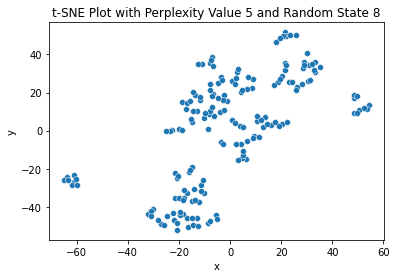

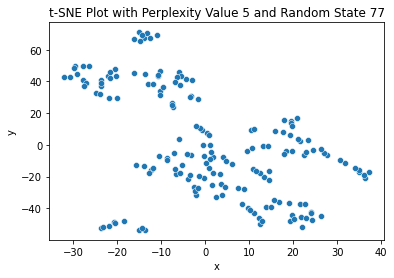

--------------------------------------------


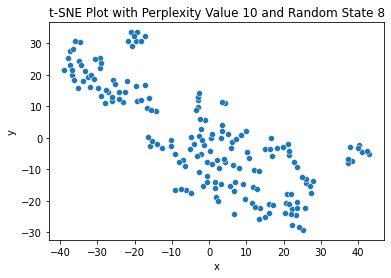

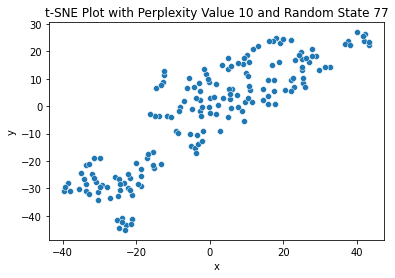

--------------------------------------------


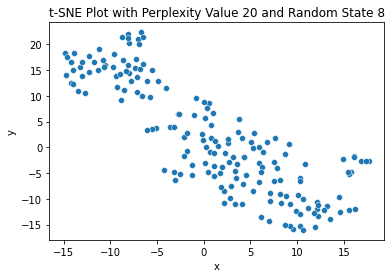

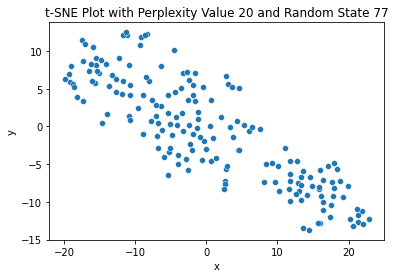

--------------------------------------------


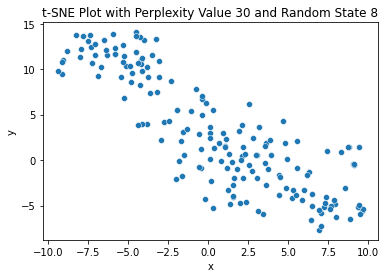

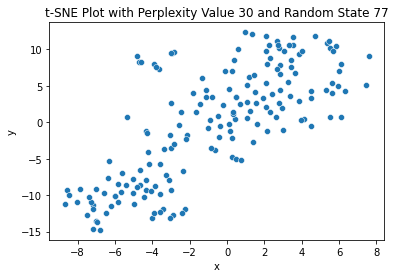

--------------------------------------------


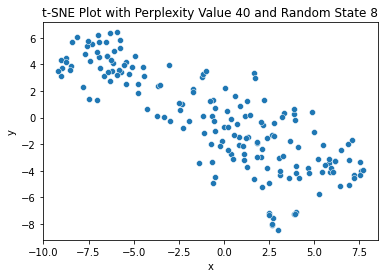

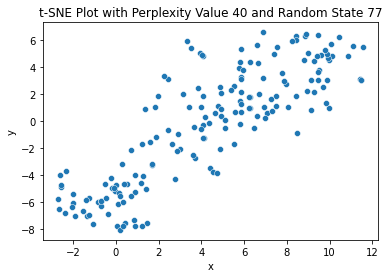

--------------------------------------------


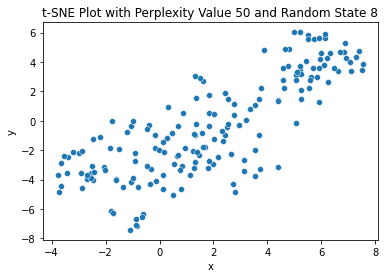

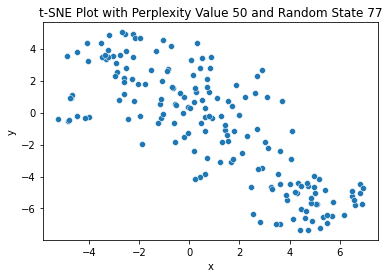

--------------------------------------------


In [14]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [8,77]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df_stand, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

**Clustering Structure**

We don't see any extremely strong clustering structure in the t-SNE plots with perplexity values of 30, 40, or 50, however we do see some evidence of a clustering structure with perplexity values 10, 20, and 30. We also see evidence of some subclusters that are present. With some evidence of structures that are overlapping. Thus, we can conlcude that our dataset is clusterable.

**Number of Clusters, Separation of Clusters, Cluster Shapes, and Clusters Sizes**

In the plots with perplexity values of 10, 20, and 30, we see that there may exist 3 or 4 clusters where some appear spherical while the larger clusters do not appear so. It looks like the large cluster in the middle has more countries. They do not seem to be balanced in size.

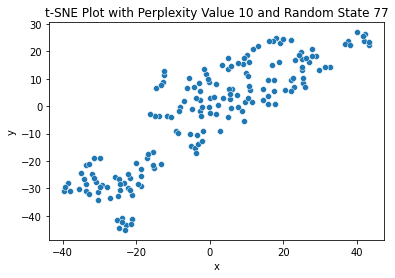

In [15]:
tsne = TSNE(n_components=2, perplexity=10, random_state=77)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df_stand, df_tsne], axis=1)
sns.scatterplot(x='x',y='y', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 77))
plt.show()

## Algorithm Selection and Motivation

#### <u>Goals</u>

1. Our goal for this dataset is to be able to index and classify different groups of countries based on their 'development' we quanitfy this development using the columns above and now want to see similar charactersitics between different groups of countries. Therefore for our purposes, we need both a partion based clustering as well as a clustering that goes beyond just partitions of countries but also looks at cluster distance. We are also interested in seeing whether some clusters of countries are closer than others. 

2. Keeping in mind, we saw the prescence of some outliers. While this may hinder the performance of k-means, as well as Hierarchical clustering for Single linkage, we will still go ahead with the clustering. We want to be able to cluster *all* of our countries and the prescence of outliers does not necessarily mean we will be removing them. 



#### <u>Clustering algorithm selection</u>

Given these factors, we will go ahead with k-means and agglomerative clustering methods with different link functions.

To begin with let us implement a naive HAC with single linkage, this will also help us determine specific outliers

### Naive Implementation of a Hierarchical Agglomerative Clustering Algorithm


In [16]:
dm = pdist(X, metric='euclidean')
dm

array([5.66284012, 5.03802925, 4.33309513, ..., 6.16253039, 4.28884514,
       5.2613496 ])

In [17]:
Z = linkage(dm, method='single')
Z

array([[1.39000000e+02, 1.49000000e+02, 2.23271989e-03, 2.00000000e+00],
       [4.00000000e+00, 6.70000000e+01, 7.53489081e-02, 2.00000000e+00],
       [1.30000000e+02, 1.33000000e+02, 2.59480602e-01, 2.00000000e+00],
       [5.90000000e+01, 8.70000000e+01, 4.71721258e-01, 2.00000000e+00],
       [3.90000000e+01, 8.90000000e+01, 5.02896626e-01, 2.00000000e+00],
       [1.74000000e+02, 1.75000000e+02, 5.60459908e-01, 3.00000000e+00],
       [3.10000000e+01, 1.00000000e+02, 6.10047469e-01, 2.00000000e+00],
       [1.31000000e+02, 1.79000000e+02, 6.43586971e-01, 3.00000000e+00],
       [1.11000000e+02, 1.77000000e+02, 7.50592918e-01, 3.00000000e+00],
       [7.40000000e+01, 9.50000000e+01, 8.00401717e-01, 2.00000000e+00],
       [8.00000000e+01, 1.55000000e+02, 8.23810020e-01, 2.00000000e+00],
       [1.90000000e+01, 1.80000000e+02, 8.39438627e-01, 4.00000000e+00],
       [2.40000000e+01, 1.83000000e+02, 8.42305559e-01, 4.00000000e+00],
       [6.10000000e+01, 1.13000000e+02, 9.02127805e

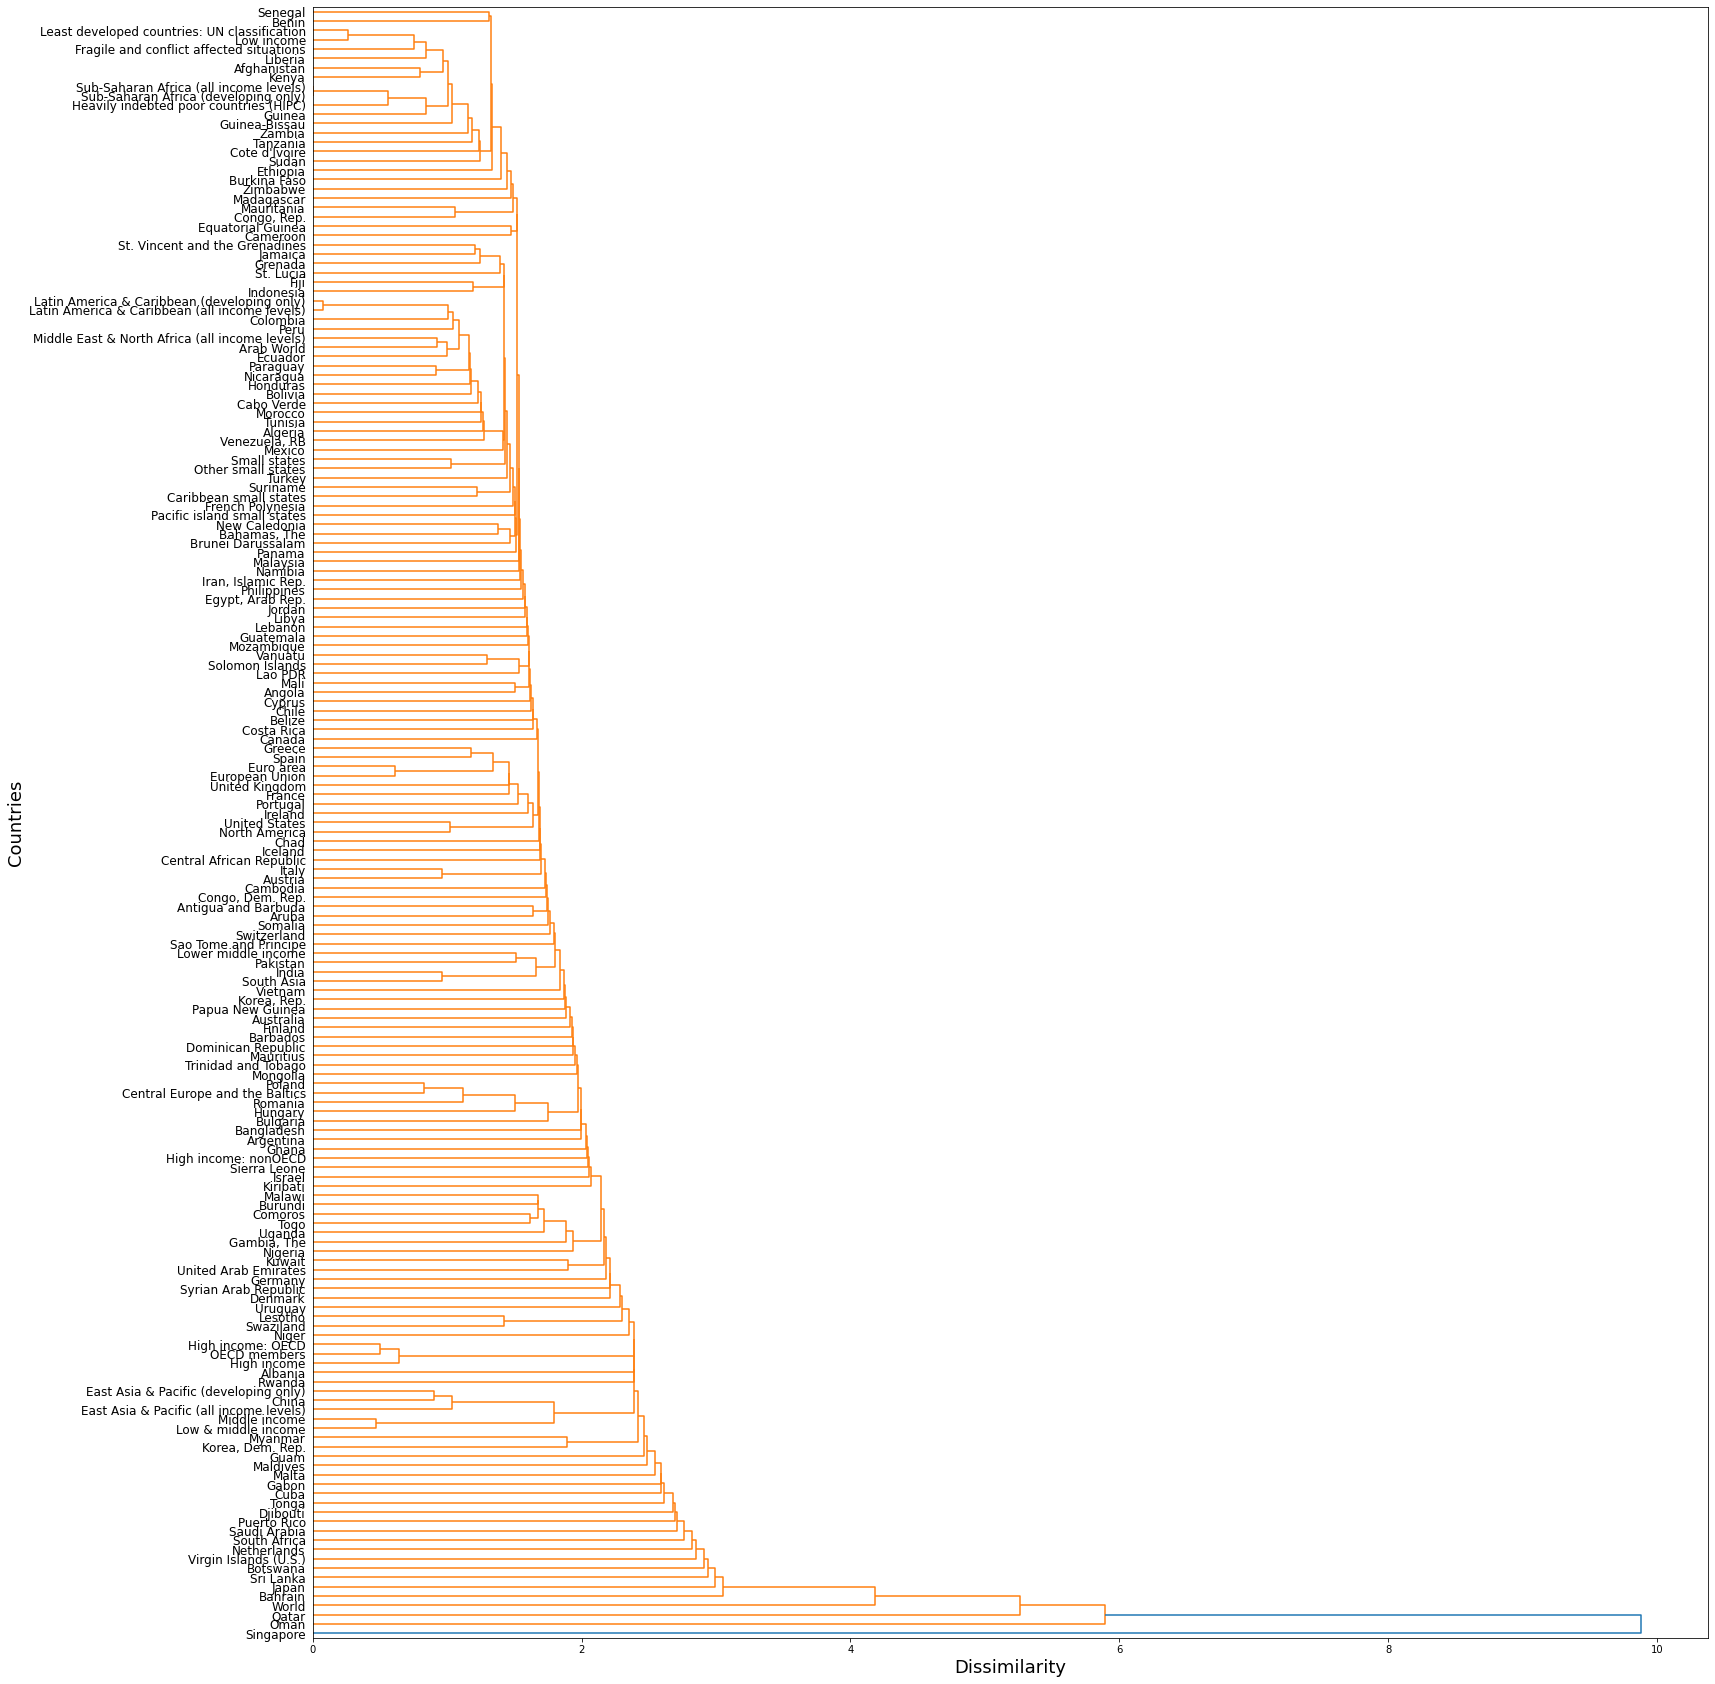

In [18]:
fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

In [19]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hac

AgglomerativeClustering(linkage='single')

In [20]:
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
df_stand['predicted_cluster_single_3'] = hac.fit_predict(X)
df_stand.sort_values(['predicted_cluster_single_3'])

,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,country,predicted_cluster_single_3
0,0.0,-1.118696,-0.295829,-0.960062,1.128350,1.275920,1.202532,-0.263844,-0.342293,-0.162848,2.042082,-1.510365,-0.670069,-0.110565,-0.301239,1.091639,-0.481135,Canada,0
111,0.0,1.003883,0.603108,0.969637,-0.997903,-1.044945,-1.019160,0.632292,-1.071177,-0.206050,-0.841690,-0.208421,-0.564881,0.715308,-0.257476,-0.736619,0.640166,Fragile and conflict affected situations,0
112,0.0,1.338929,2.999534,1.251054,-2.574370,-2.500513,-2.546662,0.307568,-1.444286,-0.291330,-0.985894,0.856864,0.802462,0.549371,-0.170718,-0.758101,0.290437,Sierra Leone,0
113,0.0,-0.816786,-0.366696,-0.790391,0.366004,0.496886,0.428262,-0.642107,-0.118446,2.215728,0.020274,0.436413,-0.188533,-1.070647,-0.100818,-0.278600,0.391281,East Asia & Pacific (developing only),0
114,0.0,-1.175119,0.414170,-0.876413,0.997424,1.160369,1.078617,-0.909718,0.942402,-0.274703,1.466055,1.099511,3.366548,-0.865937,-0.089849,1.346759,-0.951089,Denmark,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,1.310529,0.885028,1.190408,-1.451399,-1.370216,-1.416830,0.854377,-1.114432,-0.291012,-0.948245,1.526494,2.724141,0.807466,-0.105788,-0.775199,0.922801,Togo,0
61,0.0,-1.015252,-0.295829,-0.923117,0.452829,0.698161,0.572059,-0.821775,-0.324076,1.735745,0.210656,0.763608,-0.185645,-1.541196,-0.069880,-0.190897,0.460253,China,0
63,0.0,-1.363198,0.865987,-1.120389,1.114584,1.215922,1.166473,-2.548448,0.464482,0.073673,2.634567,0.429474,1.576303,-1.696763,0.073642,0.803544,-2.101990,Germany,0
140,0.0,-1.203331,-1.167191,-1.183126,1.231743,1.360362,1.297111,0.735804,1.501129,-0.276975,1.249770,-1.803700,-0.992540,1.303268,12.229564,1.907595,0.114947,Singapore,1


In [21]:
df_combo['predicted_cluster_single_3']=df_stand['predicted_cluster_single_3']

In [22]:
df_combo['predicted_cluster_single_3']=df_combo['predicted_cluster_single_3'].replace({0:'Other Countries', 1:'Singapore', 2:'Oman'})
df_combo.head()

,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,...,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,country,x,y,predicted_cluster_single_3
0,0.0,-1.118696,-0.295829,-0.960062,1.128350,1.275920,1.202532,-0.263844,-0.342293,-0.162848,...,-1.510365,-0.670069,-0.110565,-0.301239,1.091639,-0.481135,Canada,20.304482,5.761329,Other Countries
1,0.0,1.113987,-0.386515,0.807018,-0.363966,-0.382915,-0.374363,0.893175,-0.728479,-0.291402,...,0.618563,-0.358160,0.246789,0.016128,0.305299,0.832776,Sao Tome and Principe,-18.729214,-23.043797,Other Countries
2,0.0,0.411513,-0.653410,0.084153,-0.262526,-0.130367,-0.199892,0.291065,-0.734847,-0.288181,...,-1.342687,-0.574219,-0.148324,-0.259985,-0.911505,1.627998,Lao PDR,-5.177149,-14.547323,Other Countries
3,0.0,0.278118,-0.699883,0.171568,0.001384,0.052238,0.023936,0.427821,0.296867,-0.037934,...,-0.024058,-0.727830,0.545025,-0.263594,0.034350,0.195301,Arab World,-2.802223,-1.693156,Other Countries
4,0.0,-0.456370,-0.718550,-0.560353,0.581193,0.437442,0.513501,-0.314315,0.409264,0.511632,...,-0.068710,-0.411911,-0.365194,-0.257392,0.990809,-0.438572,Latin America & Caribbean (all income levels),5.946099,6.457448,Other Countries


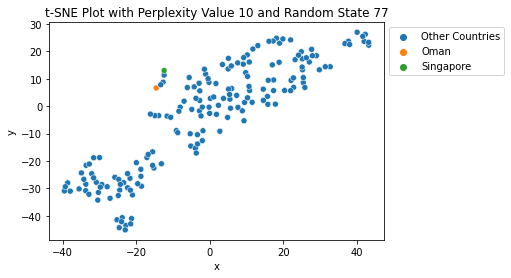

In [23]:
sns.scatterplot(x='x',y='y', hue='predicted_cluster_single_3', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 77))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [24]:
##sns.pairplot(df_combo.drop(['x','y'], axis=1), diag_kind=None, hue='predicted_cluster_single_3')
##plt.show()

## Algorithm Selection and Motivation

#### <u>Goals</u>

1. Our goal for this dataset is to be able to index and classify different groups of countries based on their 'development' we quanitfy this development using the columns above and now want to see similar charactersitics between different groups of countries. Therefore for our purposes, we need both a partion based clustering as well as a clustering that goes beyond just partitions of countries but also looks at cluster distance. We are also interested in seeing whether some clusters of countries are closer than others. 

2. Keeping in mind, we saw the prescence of some outliers (Singapore and Oman). While this may hinder the performance of k-means, as well as Hierarchical clustering for Single linkage, we will still go ahead with the clustering. We want to be able to cluster *all* of our countries and the prescence of outliers does not necessarily mean we will be removing them. 



#### <u>Clustering algorithm selection</u>

Given these factors, we will go ahead with k-means and agglomerative clustering methods with different link functions. We so have an understanding that due to our dataset having a few outliers it is possible that the clustering from Single linkage function may not be the more accurate representation

To begin with lets look at the average silhouette score for different link functions.

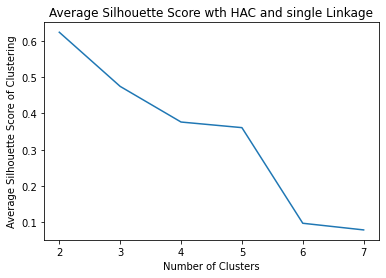

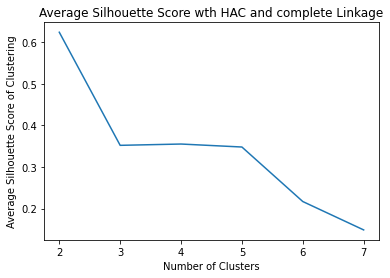

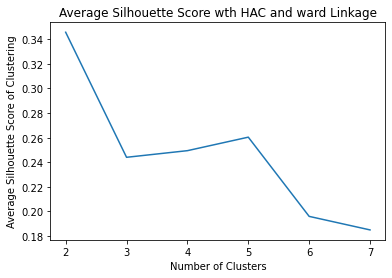

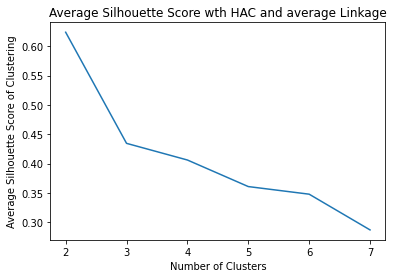

In [25]:
for link in ['single', 'complete', 'ward', 'average']:
    avg_ss=[]
    for k in [2,3,4,5,6,7]:
        #First, designate the HAC linkage function, and the number of clusters you want to extract from the resulting dendrogram
        hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=link)
        Y_pred = hac.fit_predict(X)
        avg_ss.append(silhouette_score(X, Y_pred))
        
    plt.plot([2,3,4,5,6,7], avg_ss)
    plt.title('Average Silhouette Score wth HAC and %s Linkage'%link)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score of Clustering')
    plt.show()
    


#### Interpretation

It looks like the clustering and cluster number that produced the highest average silhouette scores above are HAC with single linkage, average and complete with 2 clusters. However this could be the case that one country like Singapore or Oman gets classified as a single cluster and the others as anotehr cluster. This is not helpful for our purposes since we need groups of countries, and not a bifurcation of a single country versus multiple.

For this reason we will go through the exercise of determining the best linkage function by observing the dendogram and color coded t-SNE plots.

### HAC with Single Linkage

Let's first examine the dendrogram and clustering results (extracted clustering results with k=2,..., and k=7 clusters) using the HAC with single linkage first.

#### Dendrogram
In the dendrogram, for HAC with single linkage we do **not** see it capturing any larger clusters but rather it picks off or selects each outliers one by one.

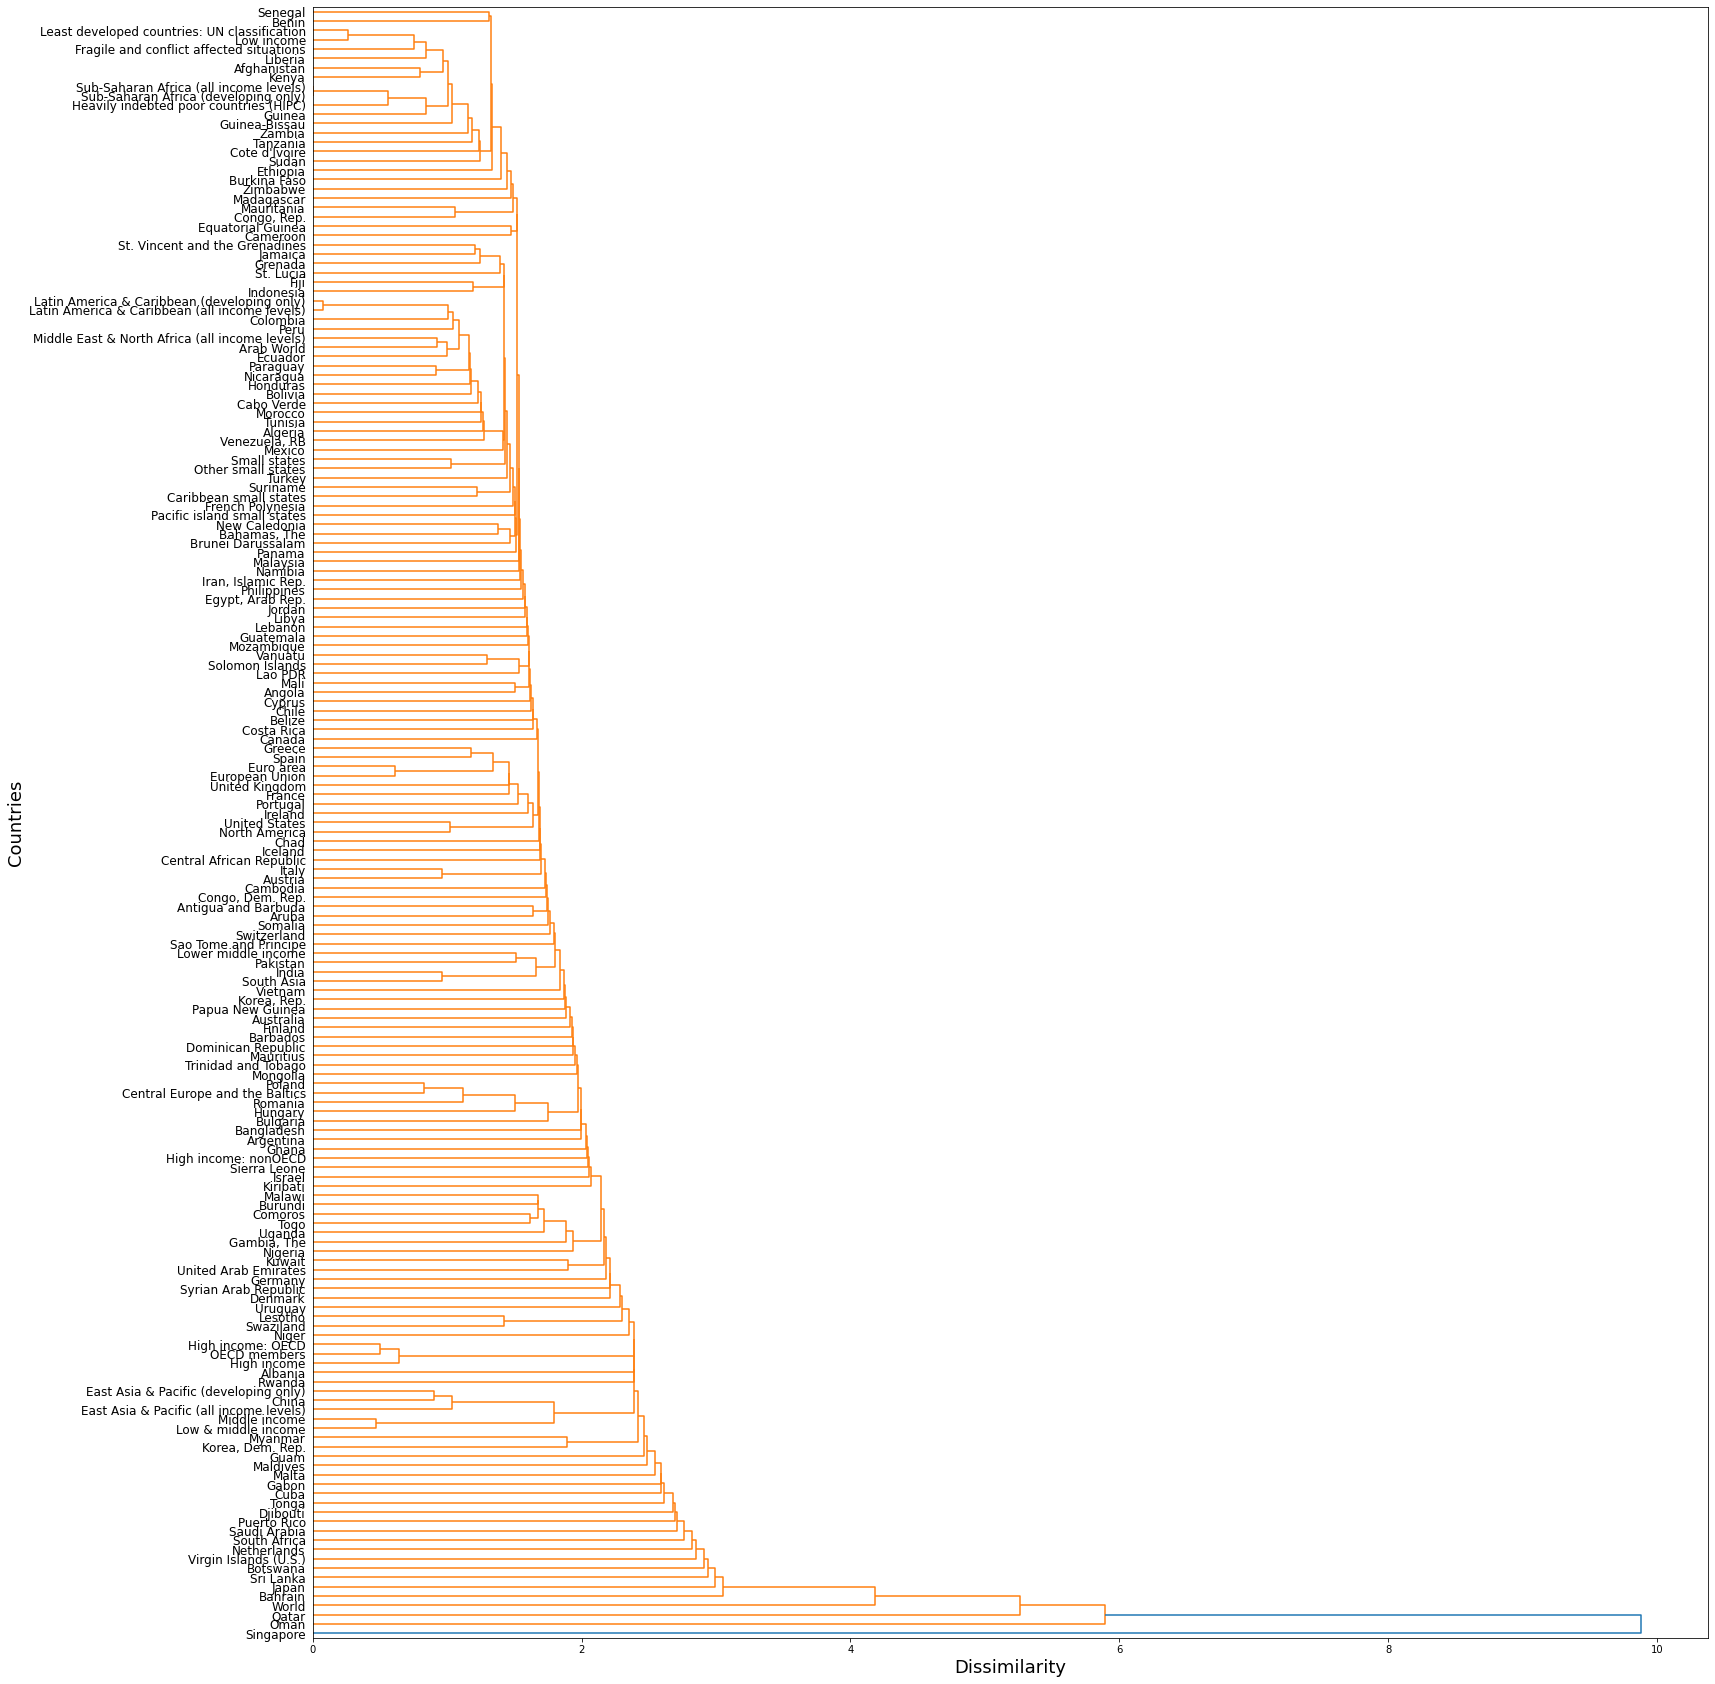

In [26]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='single')

fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

#### Extracted Clusterings from the Dendrogram
As expected with the t-SNE plots, as mentioned before, HAC with single linkage seperates the outlier as a single cluster while all other countries are their own cluster. This is not a favorable result, but an expected result with HAC single linkage.

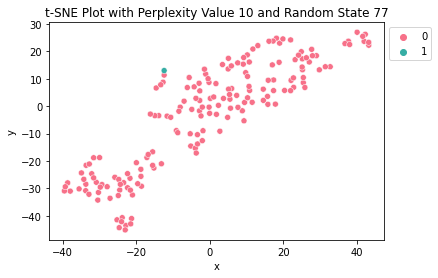

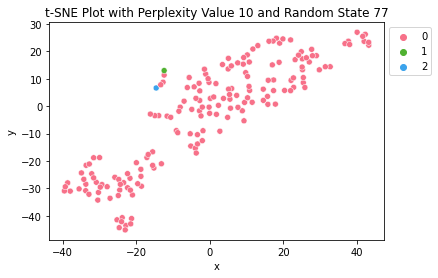

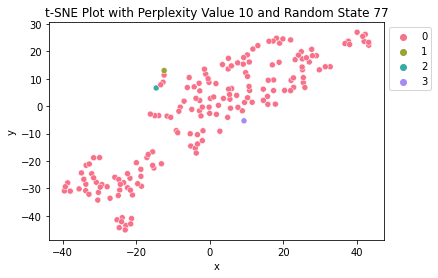

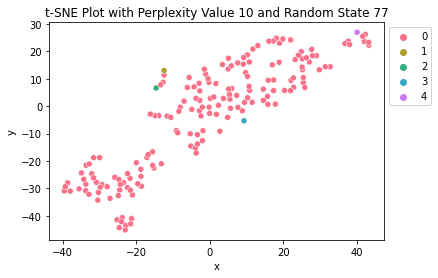

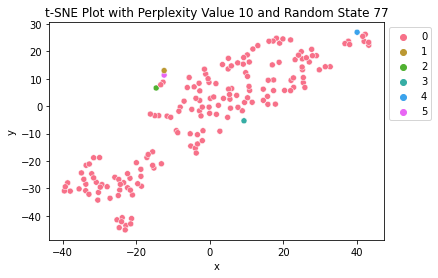

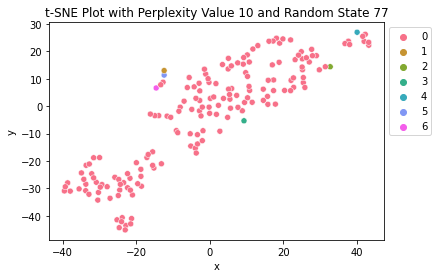

In [27]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 77))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### HAC with Complete Linkage

Let's next examine the dendrogram and clustering results (extracted clustering results with k=2,..., and k=7 clusters) using the HAC with complete linkage.

#### Dendrogram
The dendrogram for HAC with complete linkage is below. In the dendrogram for complete we see it identify larger clusters unlinke single linkage, however we notice some singleton clusters like with Singapore, as well as some small clusters like Qatar and Oman. This again is not extremely favorable.

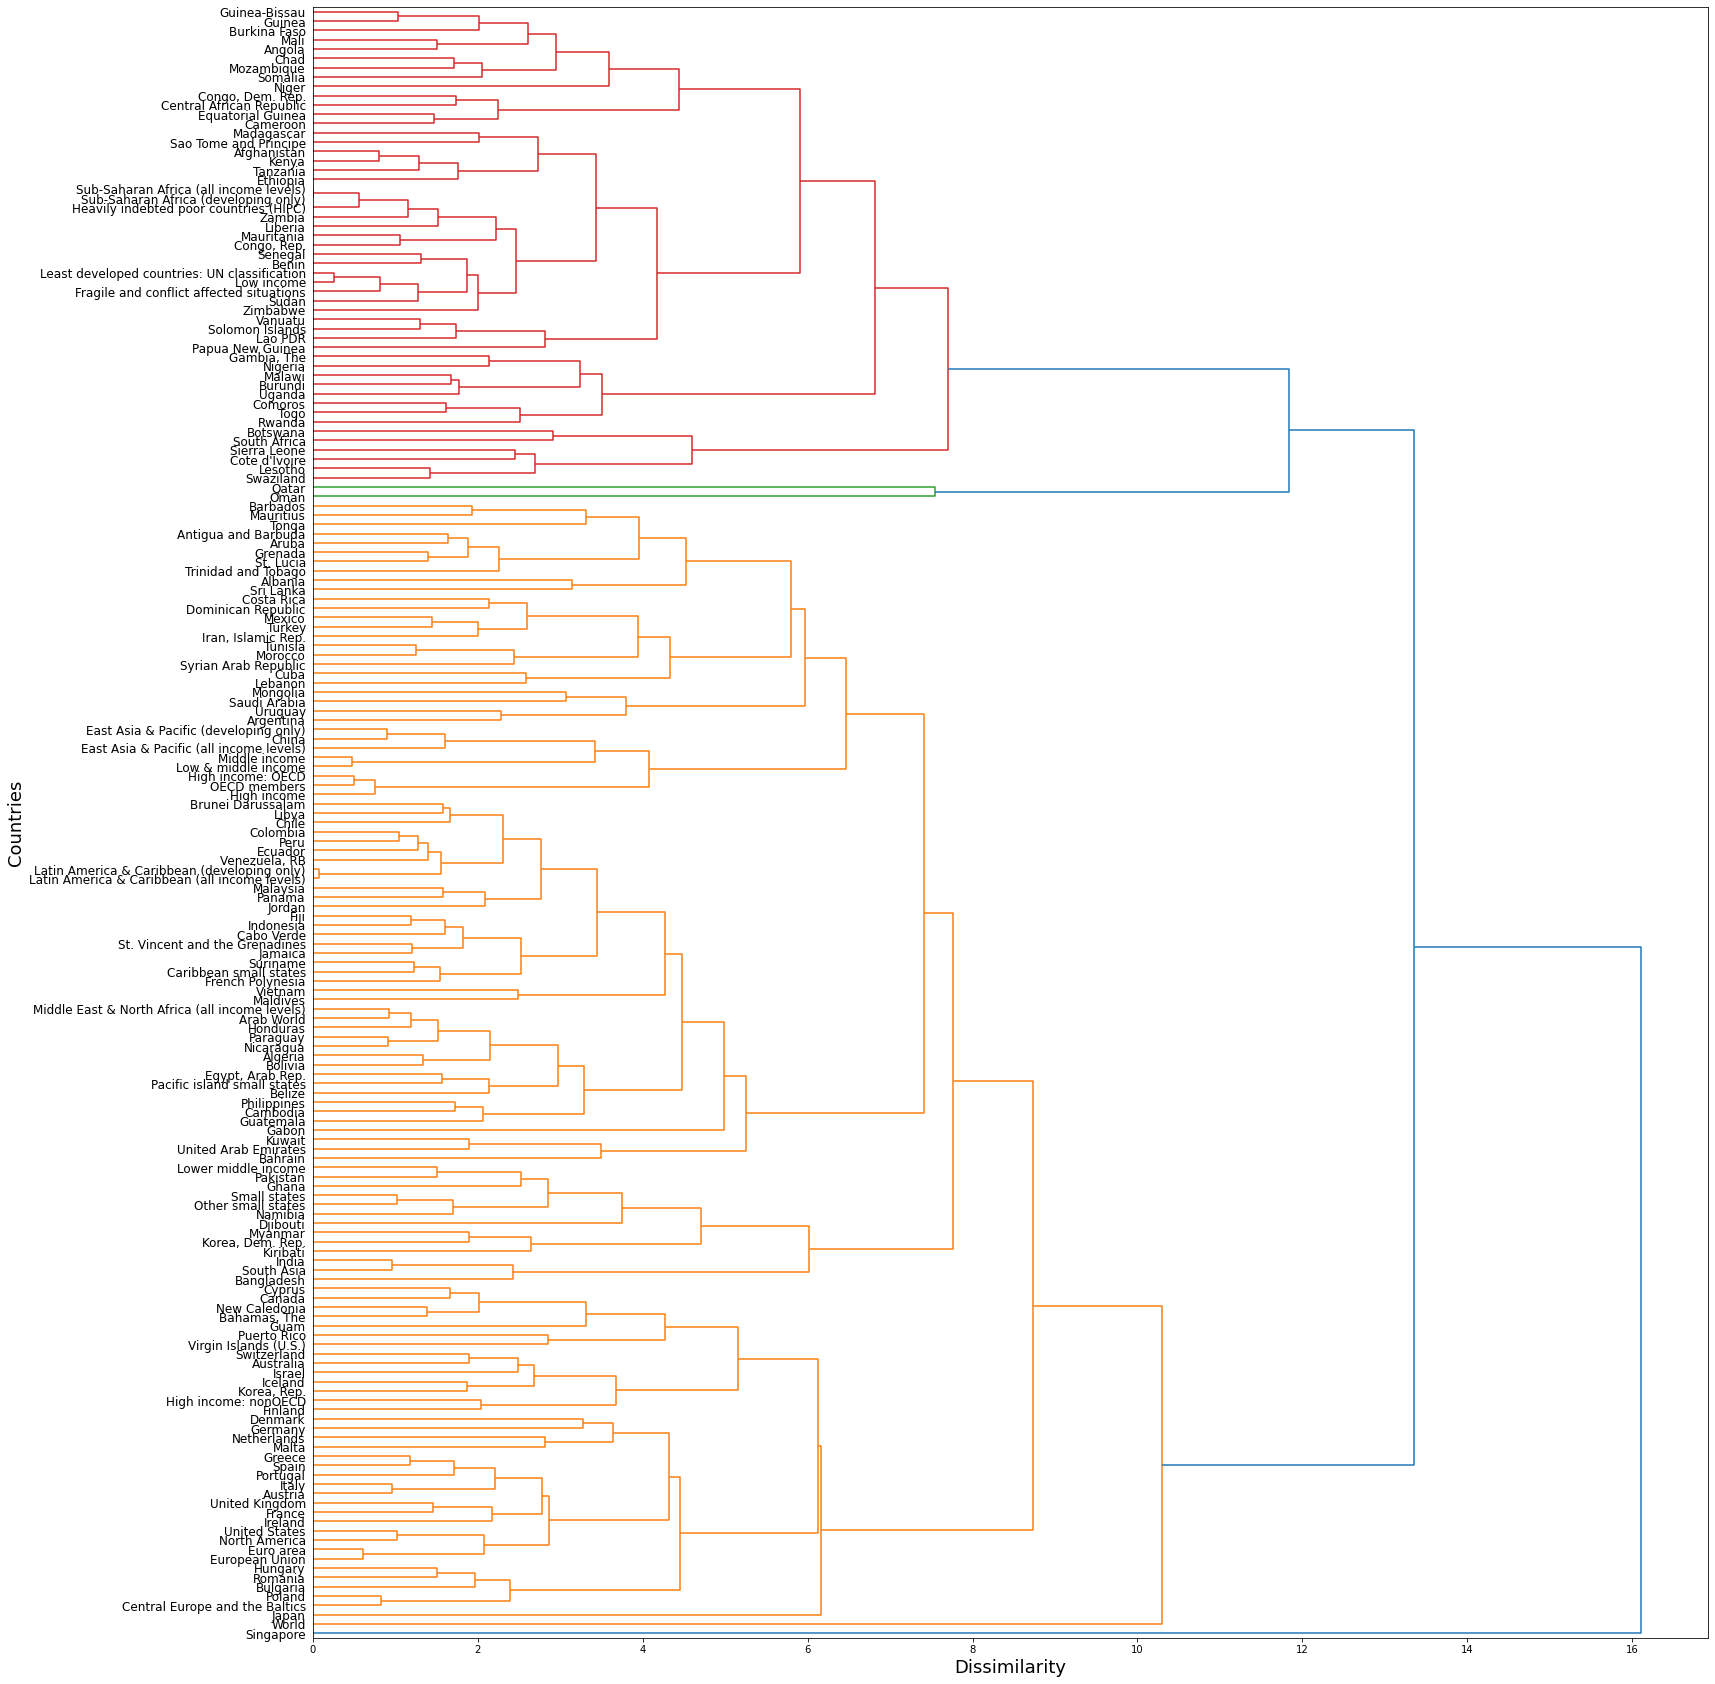

In [28]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='complete')

fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

#### Extracted Clusterings from the Dendrogram

We notice again that that our singleton cluster of Singapore exists in our t-SNE plots for HAC with complete linkage. This agrees with with HAC as in both cases it is isolated. 

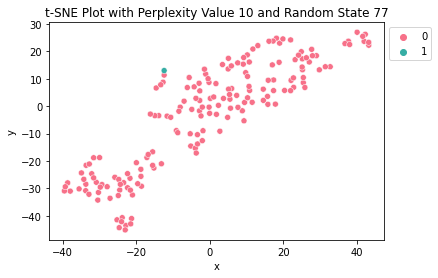

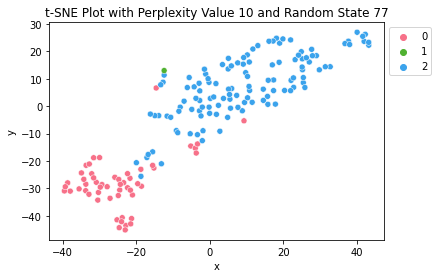

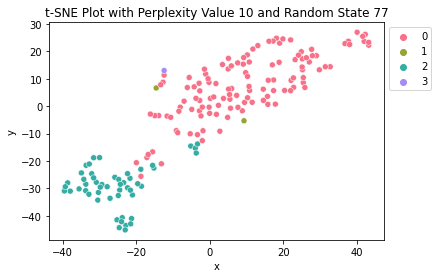

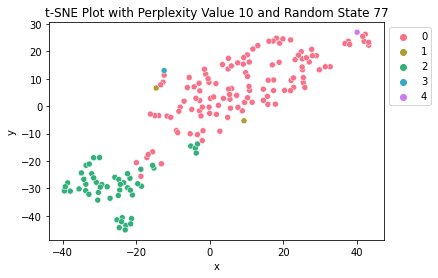

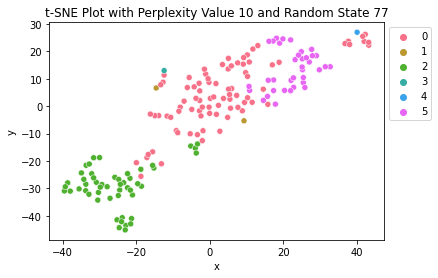

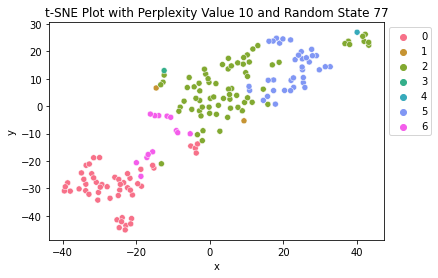

In [29]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 77))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### HAC with Average Linkage

Let's next examine the dendrogram and clustering results (extracted clustering results with k=2,..., and k=7 clusters) using the HAC with average linkage.

#### Dendrogram
The dendrogram for HAC with average linkage is below. Similar to our single linkage we have some singleton clusters or extremely small clusters. We also again see that Singapore is isolated and a singleton cluster. This is unfavorable for our purposes.

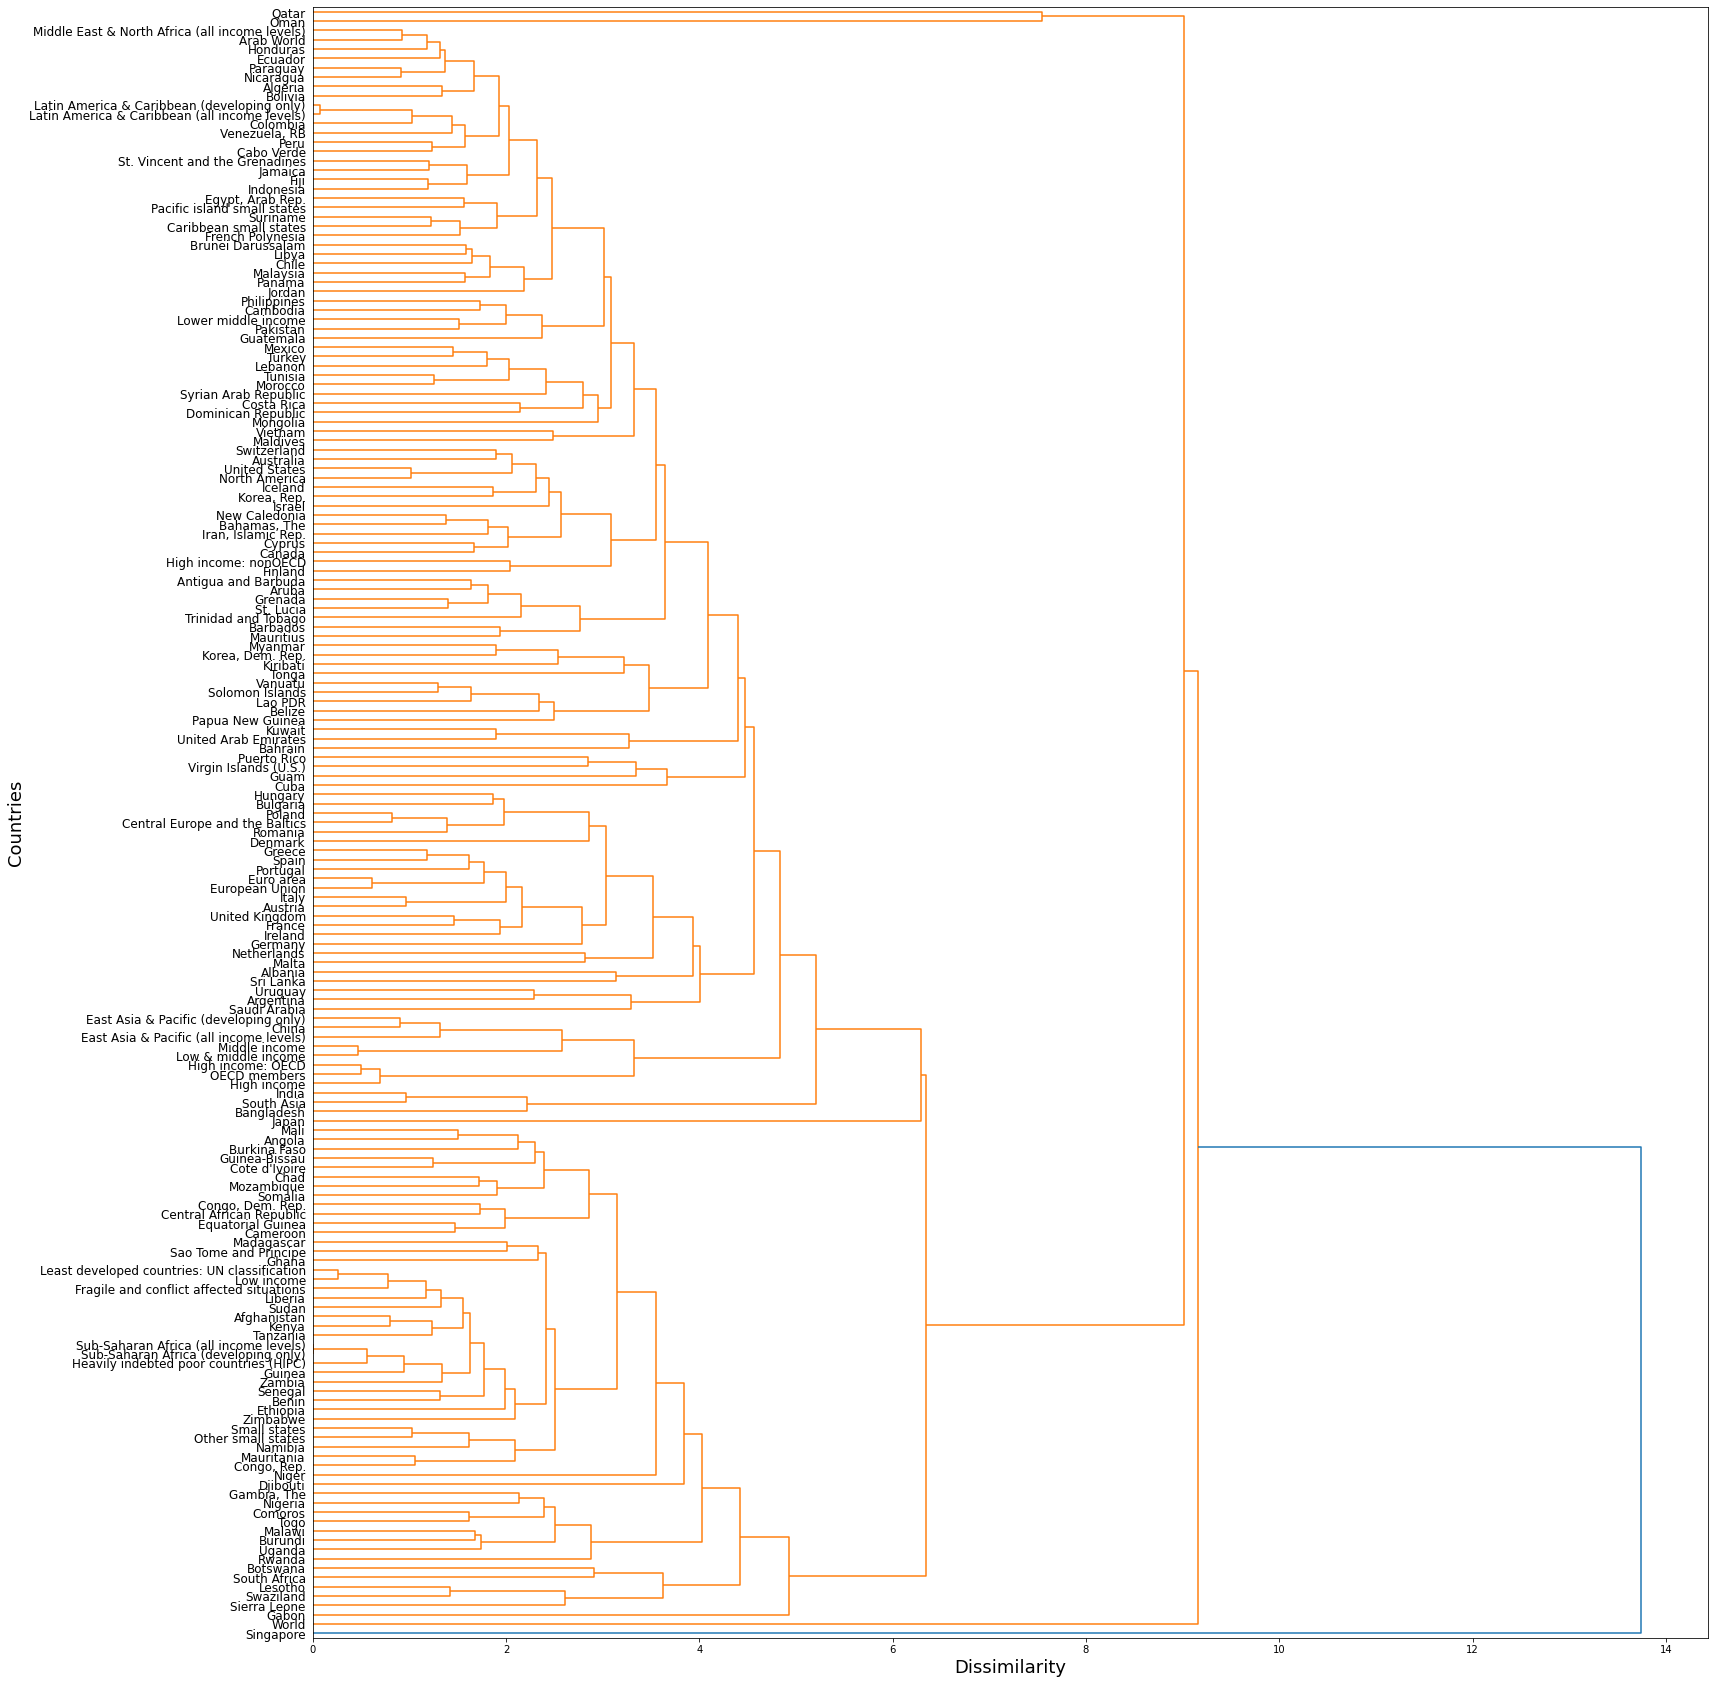

In [30]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='average')

fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

#### Extracted Clustering from the Dendrogram

Until k=6 clusters we have numerous singleton clusters, with a large group of countries being under the same cluster. While average does get the larger groups of clusters at this point, we still will not proceed forward to average linkage due to the prescence of numerous singleton clusters.

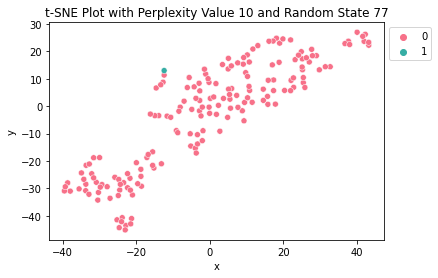

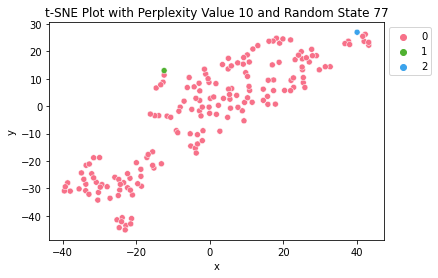

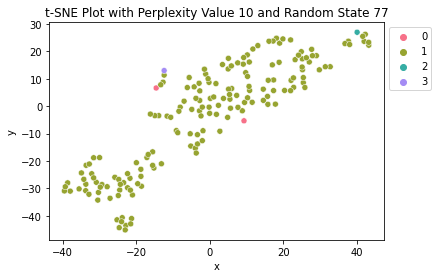

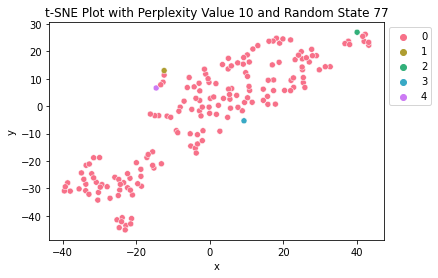

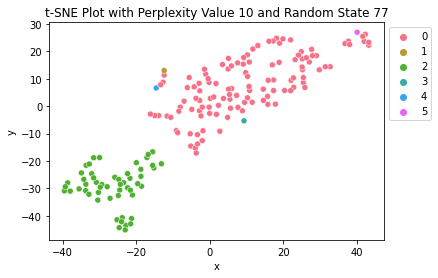

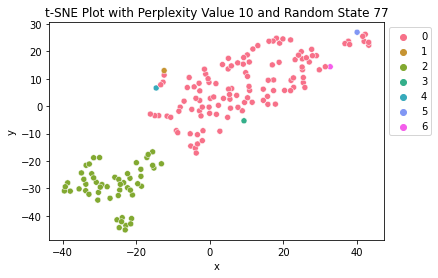

In [31]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 77))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### HAC with Ward's Linkage

We'll next examine the dendrogram and clustering results (extracted clustering results with k=2,..., and k=7 clusters) using the HAC with Ward's linkage.

#### Dendrogram
The dendrogram for HAC with Ward's linkage is below. This seems to identify the prescence of larger clusters, and does not isolate countries as singleton clusters, thus far this has proven to be the best linkage function. There is some evidence of an overlap within the clusters, once we get to 3 clusters, one can extrapolate that the 3rd cluster is a possible subcluster

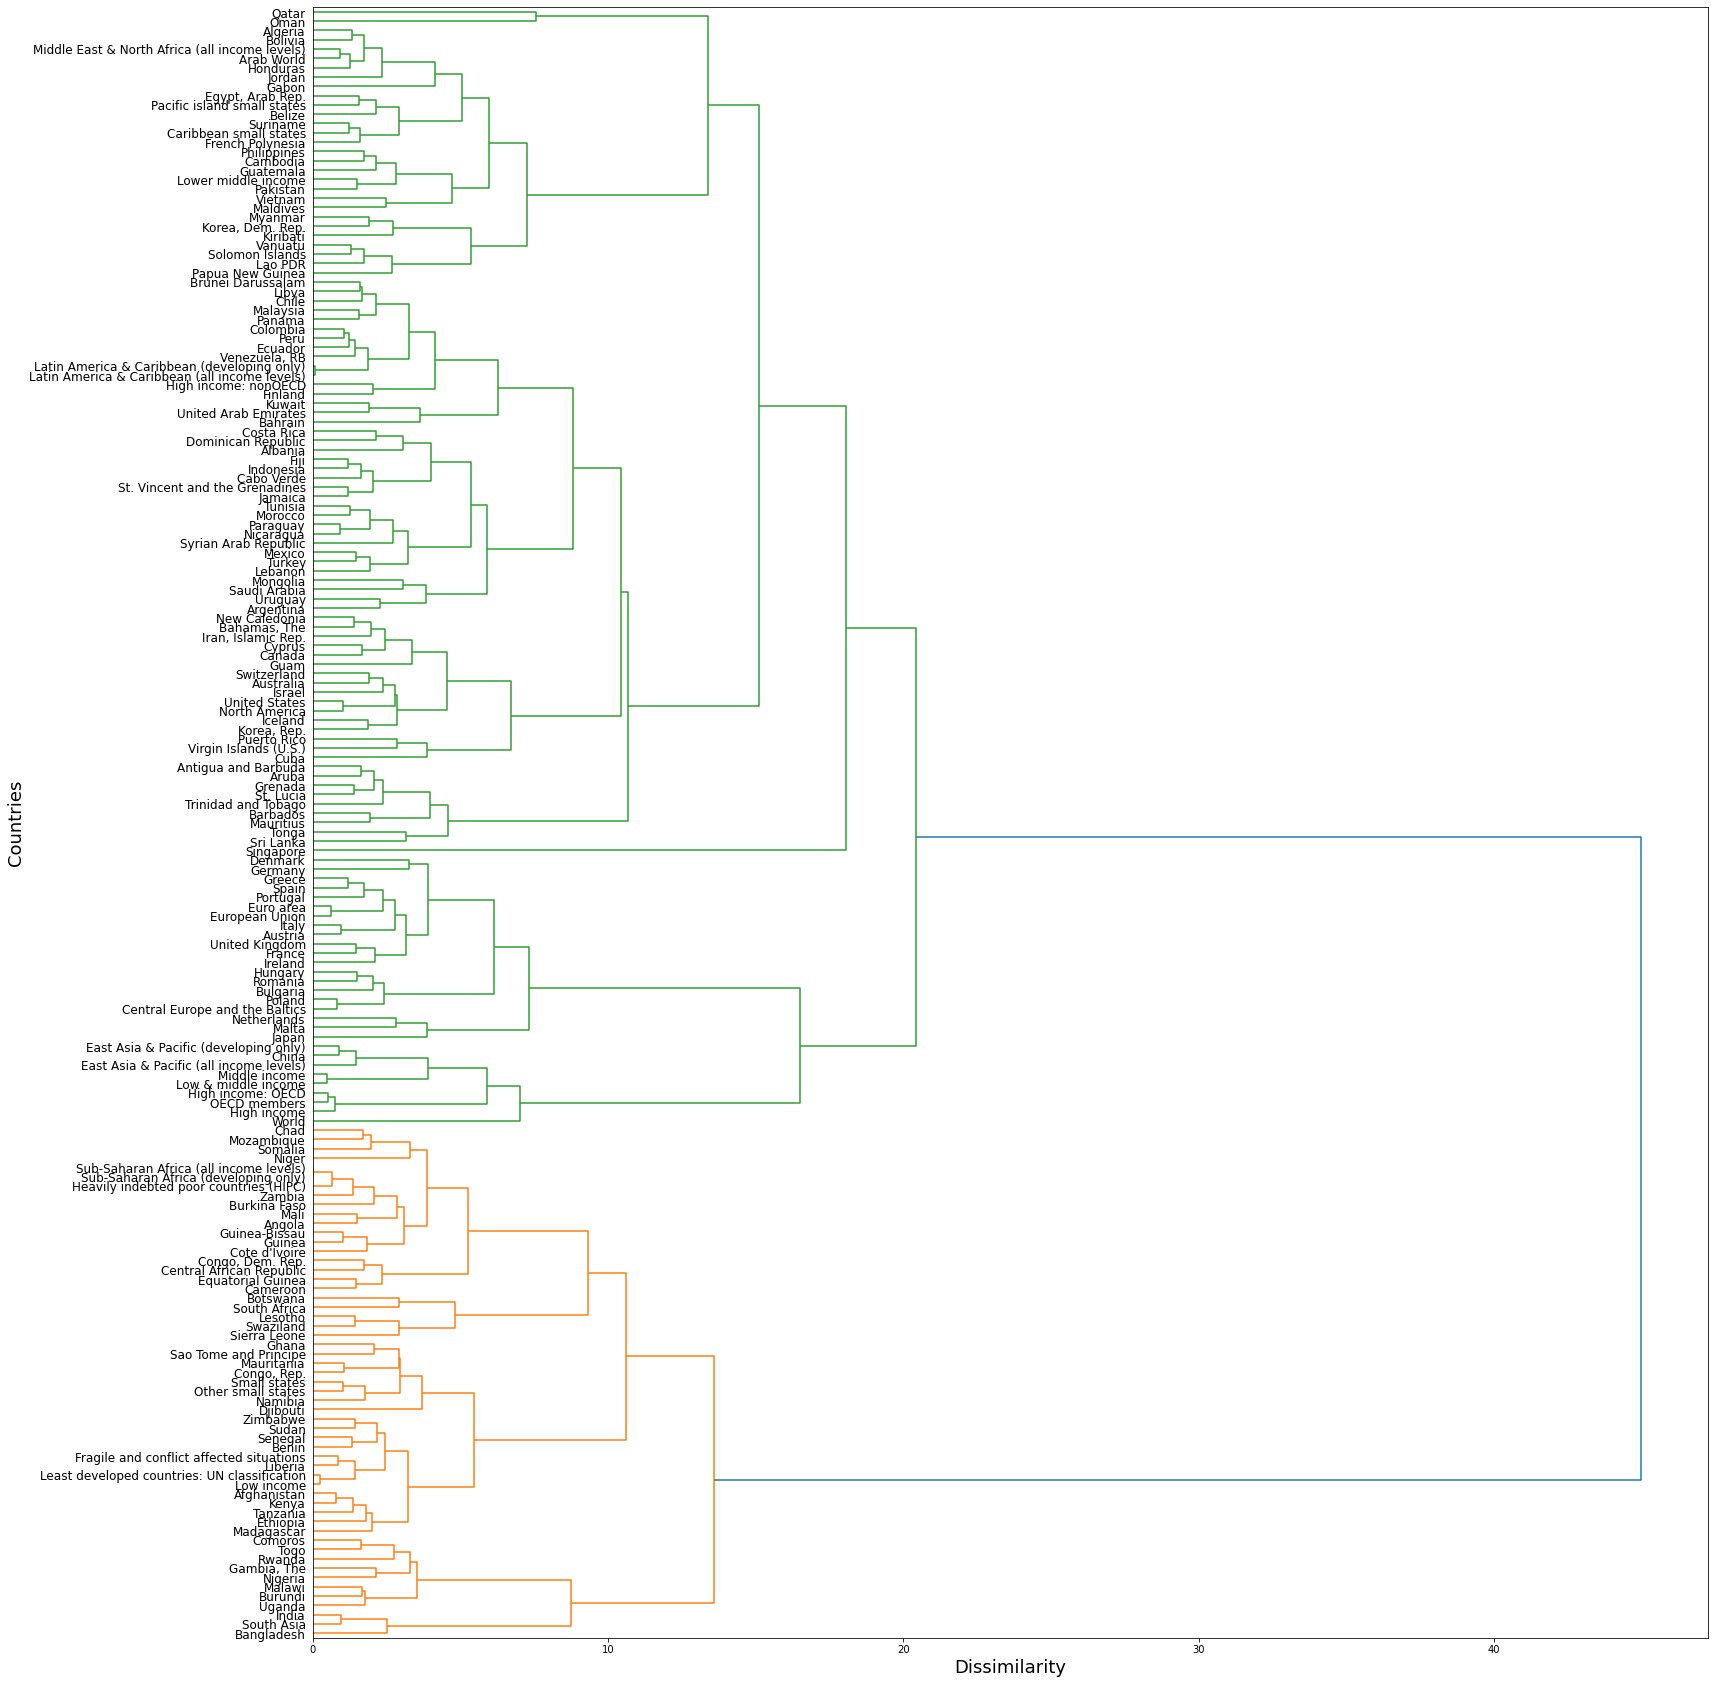

In [32]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='ward')

fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', labels=df_stand['country'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
plt.yticks(fontsize=12)
plt.show()

#### Extracted Clustering from the Dendrogram

After k = 3 clusters, our HAC isolates a singleton cluster. For this reason we disregard the information presented after k = 3 clusters. Until then, we see that it seperates the larger cluster suggested initailly into two clusters. This may be an indication of Ward's suggesting distinctions that are not necessarily needed, however we will still go ahead with 3 clusters.

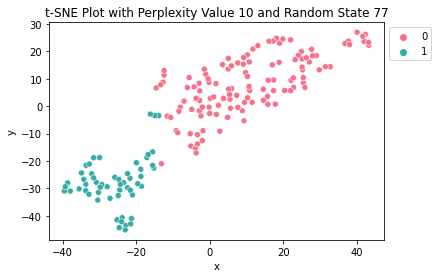

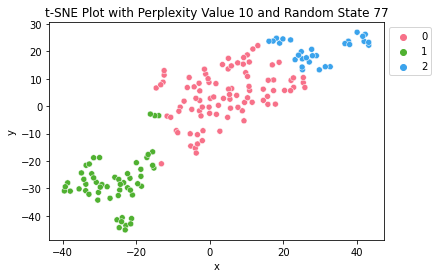

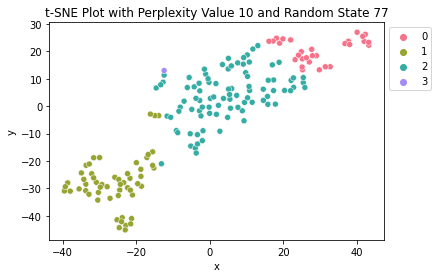

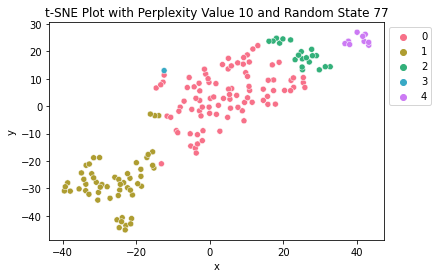

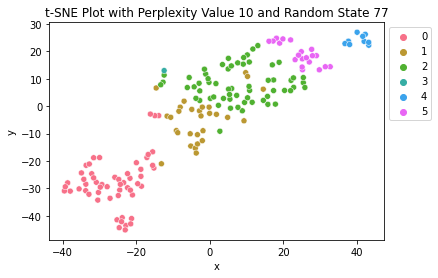

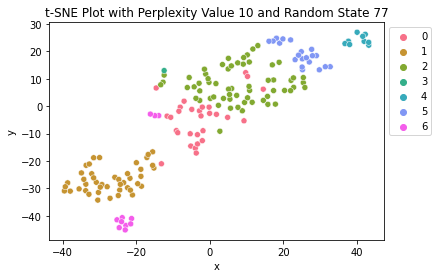

In [33]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 77))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### Final Insights

Our research goals indictad being able to find clusters of countries with similar development features and grouping them. We wanted whole clusters that ensured that we did not treat a single country as its own cluster, thus we did not want Singapore in its own category. It would not make sense with the goal of resource allocation. Thus, for all these reasons and given our t-SNE plots and dendograms. 

We go ahead with Ward linkage and 3 clusters as our final HAC algorithm.


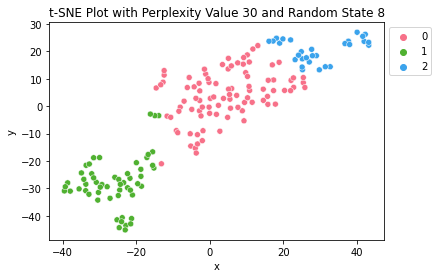

In [34]:
#Clustering from dendrogram with k clusters
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df_combo['predicted_cluster'] = hac.fit_predict(X)

#Map the resulting cluster labels onto our chosen t-SNE plot
sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", 3), data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

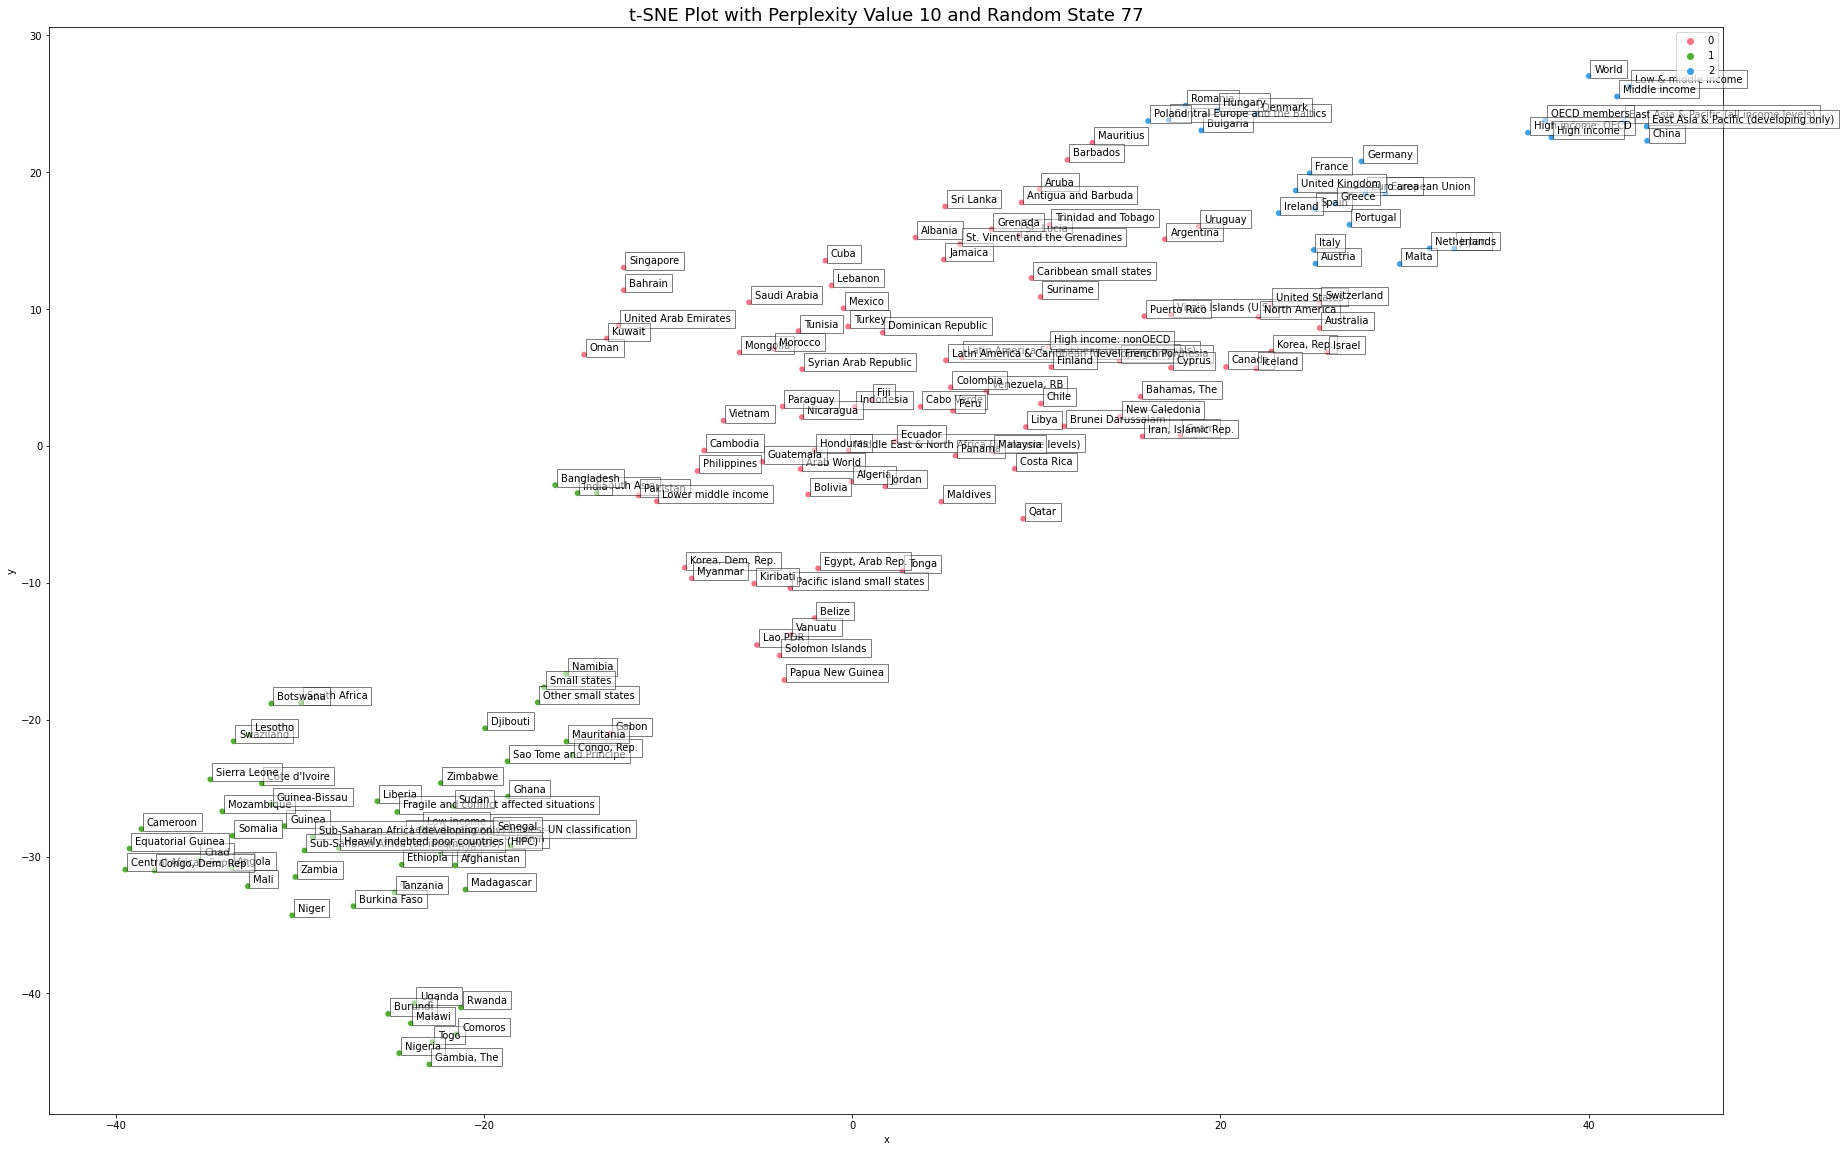

In [35]:
#Map the resulting cluster labels onto our chosen t-SNE plot
plt.figure(figsize=(30,20))
sns.scatterplot(x='x',y='y', hue='predicted_cluster', palette=sns.color_palette("husl", 3), data=df_combo, s=40)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 77), fontsize=18)
plt.legend(bbox_to_anchor=(1,1))


for i in range(df_combo.shape[0]):
    plt.text(x=df_combo.x[i]+0.3,y=df_combo.y[i]+0.3,s=df_combo.country[i], 
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='white',alpha=0.5))

plt.show()

### <u>Cluster Similarity</u>

We notice that clusters 0 and 2, the clusters with higher indexes associated with development seem to be more similar than clusters 0 and 1 and 1 and 2.

In [36]:
##sns.pairplot(df_combo.drop(['x','y'], axis=1), diag_kind=None, hue='predicted_cluster')
##plt.show()

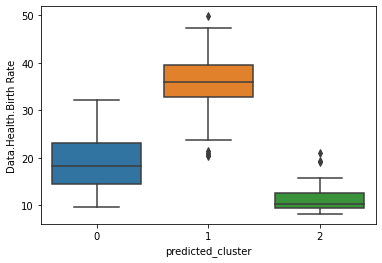

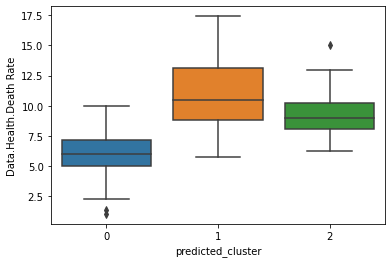

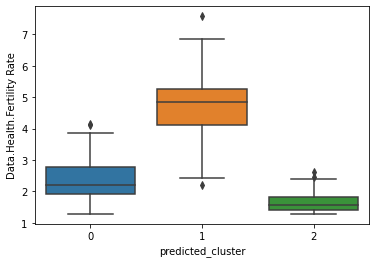

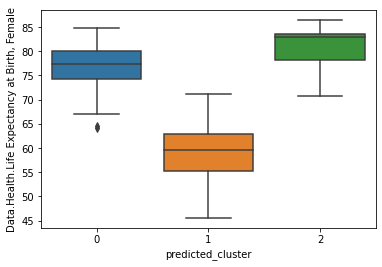

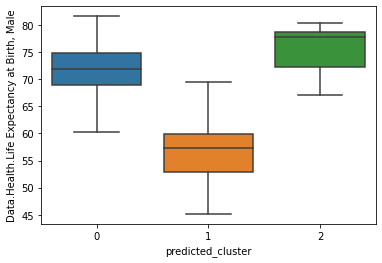

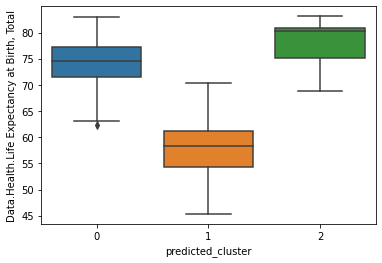

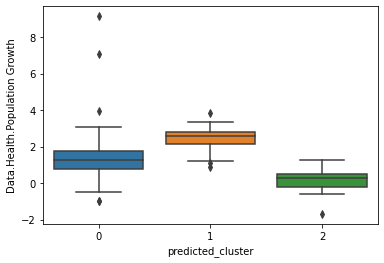

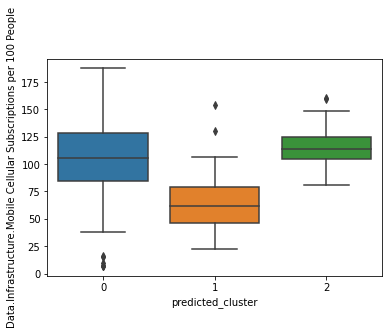

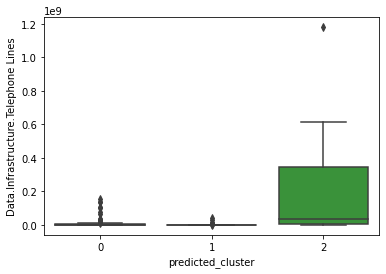

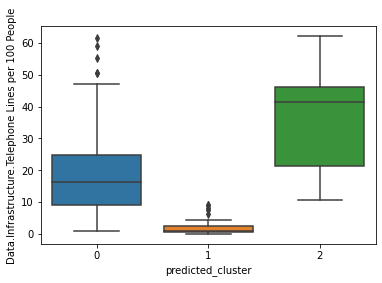

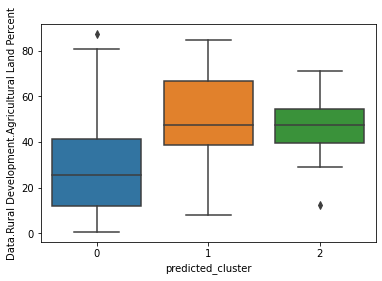

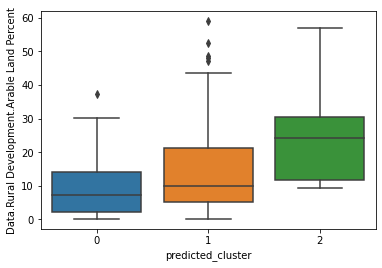

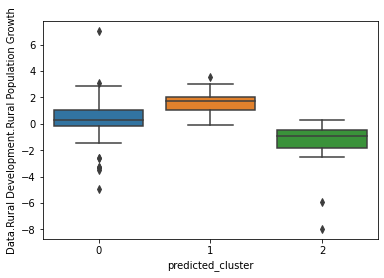

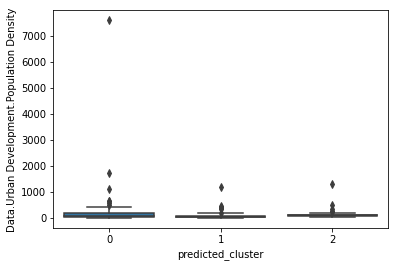

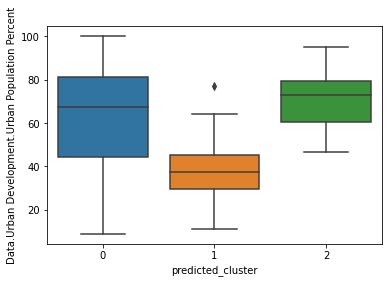

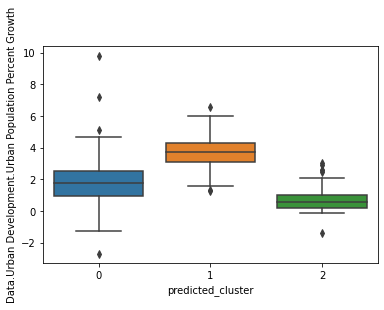

In [37]:
#### Cluster Characteristics

df['predicted_cluster'] = list(df_combo['predicted_cluster'])

for col in df.columns:
    if col == 'Country':
        continue
    if col == 'Year':
        continue
    if col == 'predicted_cluster':
        continue
    sns.boxplot(x="predicted_cluster", y=col, data=df)
    plt.show()

### Cluster 1

These can be classfied as countries that are 'low development/ developing' with high birth, death, and fertility rates, low life expectancies, less mobile cellular subscriptions and less telephone lines. We see that they have higher agricultural land and a higher rural population growth. Conversly, they have a lower urban population percetange but the largest growth of urban population 

In [38]:
df[df['predicted_cluster']==1]

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,predicted_cluster
67,Sao Tome and Principe,2013,34.742000,6.919000,4.145000,68.156000,64.210000,66.134878,2.651021,64.951249,8035.0,4.271709,51.770833,9.062500,0.857526,195.935417,63.265000,3.707378,1
237,Ethiopia,2013,33.545000,7.838000,4.642000,64.606000,61.404000,62.965951,2.579385,22.374519,797501.0,0.869411,36.488000,15.346000,2.061423,91.728849,18.160000,4.947512,1
339,Swaziland,2013,30.211000,14.267000,3.407000,48.278000,49.396000,48.850634,1.541159,65.394785,45565.0,3.701507,71.046512,10.174419,1.606010,71.568895,21.374000,1.302962,1
373,South Asia,2013,21.470060,7.596810,2.593165,68.252047,65.110869,66.644707,1.281770,69.007420,42031469.0,2.547332,54.638749,41.143840,0.683962,345.640317,31.787826,2.588850,1
509,Burkina Faso,2013,41.411000,11.361000,5.693000,56.470000,55.283000,55.862024,2.864602,60.607652,141358.0,0.858790,44.115497,21.929825,1.713713,60.161334,27.346000,5.988279,1
679,Guinea,2013,37.343000,11.648000,5.001000,56.636000,55.091000,55.844659,2.562786,48.769250,0.0,0.000000,58.603288,12.209018,1.863312,46.602934,35.748000,3.832425,1
781,"Congo, Rep.",2013,38.009000,10.499000,5.012000,59.743000,56.919000,58.296561,2.609040,98.756828,14932.0,0.344289,31.039531,1.551977,1.407351,12.700003,64.100000,3.288423,1
849,Liberia,2013,36.016000,9.011000,4.868000,61.177000,59.282000,60.206390,2.678183,57.121373,10.0,0.000239,28.135382,5.191030,1.955929,43.505347,48.541000,3.449593,1
985,Tanzania,2013,39.664000,8.823000,5.287000,62.172000,59.584000,60.846439,3.035148,56.964238,176367.0,0.369099,45.890720,16.369384,2.054257,53.943449,29.493000,5.419849,1
1291,India,2013,20.723000,7.937000,2.505000,68.002000,64.505000,66.210854,1.263760,69.922390,30786709.0,2.489451,60.305598,52.536165,0.745862,415.946082,31.631000,2.392422,1


### Cluster 0

These are countries that are mostly in the middle of this range of development. They are middle-higher income countries with most metrics lying between the lowest developing countries and the highest. They perform fairly high in numerous metrics that are typically associated with positive development. They have the lowest death rate and the lowest agricultural and arable land percent. They are comparable to the highest developing countries and as aformentioned could be a subcluster of Cluster 2.

In [39]:
df[df['predicted_cluster']==0]

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,predicted_cluster
33,Canada,2013,11.000000,7.200000,1.610000,83.441000,79.140000,81.238049,1.191184,80.050464,17647000.0,50.654490,7.186004,5.049205,0.244165,3.821881,81.293000,1.410386,0
101,Lao PDR,2013,27.272000,6.092000,3.108000,69.195000,66.483000,67.805927,1.891325,64.702256,450000.0,6.771166,10.697574,6.282496,0.179355,28.794744,35.368000,5.097592,0
135,Arab World,2013,25.853504,5.947998,3.233402,71.898085,68.126502,69.949702,2.063874,105.040566,34786428.0,9.574076,38.312828,4.305996,1.369418,26.610084,57.053106,2.592937,0
169,Latin America & Caribbean (all income levels),2013,18.043066,5.890156,2.183411,77.836767,71.593453,74.638654,1.127505,109.435113,110192326.0,18.110476,37.377695,8.370902,-0.192879,30.364071,78.981328,1.484795,0
203,Cambodia,2013,25.917000,6.024000,2.894000,74.167000,68.782000,71.408829,1.756269,128.527211,584475.0,3.931981,32.602538,23.226830,1.543624,84.209415,20.137000,2.604093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,Mexico,2013,18.771000,4.509000,2.216000,79.568000,74.818000,77.135073,1.237476,83.350708,20587824.0,17.036205,54.890815,11.899483,-0.092042,62.165939,78.407000,1.606747,0
6085,Tunisia,2013,19.000000,6.100000,2.170000,77.200000,73.100000,75.100000,0.966849,118.105650,1098893.0,10.104842,64.875129,18.273687,0.452268,69.371138,66.274000,1.229733,0
6119,Nicaragua,2013,23.142000,4.578000,2.541000,77.599000,71.481000,74.465390,1.455651,97.663280,299123.0,4.992262,42.138940,12.464683,0.753648,49.790037,57.841000,1.970449,0
6289,High income: nonOECD,2013,13.821535,9.970351,1.765720,77.329525,68.917341,73.442825,0.758121,149.317712,79399332.0,31.806157,20.818122,6.554736,0.141454,12.591190,77.141281,0.996497,0


### Cluster 1

These can be classfied as countries that are developed or highly developed. These have low death, birth and fertility rates and have the highest life expectancy across all clusters for both male and female. They have low population growth, high cellphone and telephone lines rates per 100 people. They also have the most rural arable land, the lowest rural and urban population growth. They are also urbanized with having a large number of an urban population. However it is interesting to see 'low and middle income' countries fall under this cluster.

In [40]:
df[df['predicted_cluster']==2]

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,predicted_cluster
713,World,2013,19.359001,7.993537,2.468951,72.931768,68.716272,70.779243,1.126657,88.555316,1.179047e+09,16.665608,37.675227,10.759800,0.110297,54.288853,52.523031,2.068414,2
815,Spain,2013,9.700000,8.600000,1.320000,85.400000,79.500000,82.378049,0.039714,108.364018,1.957463e+07,41.866791,54.049719,24.859663,-1.039854,93.747522,78.902000,0.330371,2
917,East Asia & Pacific (all income levels),2013,13.697328,7.095776,1.818717,76.666886,72.829907,74.732872,0.667769,91.619521,4.735598e+08,20.945729,48.687581,9.555621,-1.454162,91.594596,53.815804,2.569418,2
1121,European Union,2013,10.369608,9.911911,1.569959,83.463705,77.777361,80.544428,-0.077211,122.587818,2.225280e+08,43.772076,44.041265,25.580291,-0.896603,119.351566,74.142701,0.211748,2
1393,OECD members,2013,12.115576,8.169642,1.750578,82.734957,77.312092,79.955130,0.460257,107.173620,5.223946e+08,41.533378,35.660092,11.443728,-0.827880,36.526855,79.549225,0.796841,2
1733,France,2013,12.600000,8.700000,2.010000,86.100000,79.200000,82.565854,0.508579,97.377753,3.967400e+07,62.052120,52.668105,33.403767,-0.599522,119.944185,78.820000,0.808445,2
2141,Low & middle income,2013,21.122852,7.775105,2.625618,70.770017,67.054867,68.853430,1.291156,81.848543,6.146612e+08,10.648746,43.401684,11.754391,0.179674,73.308332,46.470870,2.602691,2
2209,China,2013,12.100000,7.200000,1.663000,76.522000,73.940000,75.199512,0.487231,80.762715,2.781530e+08,20.198975,54.808419,11.282235,-2.211368,143.871394,51.889000,3.056130,2
2277,Germany,2013,8.400000,10.800000,1.380000,83.300000,78.600000,80.892683,-1.691349,111.594040,5.010000e+07,60.507158,47.810868,33.953061,-2.478383,230.750625,74.688000,-1.423209,2
2787,Bulgaria,2013,9.500000,15.000000,1.500000,77.900000,70.900000,74.314634,-0.579221,148.131112,2.132905e+06,29.306877,47.190494,30.554532,-1.803751,67.298158,72.971000,-0.121812,2


## K-means Implementation

-----------
Clusterings with k= 1 Clusters
-----------
Clusterings with k= 2 Clusters
-----------
Clusterings with k= 3 Clusters
-----------
Clusterings with k= 4 Clusters
-----------
Clusterings with k= 5 Clusters
-----------
Clusterings with k= 6 Clusters
-----------
Clusterings with k= 7 Clusters


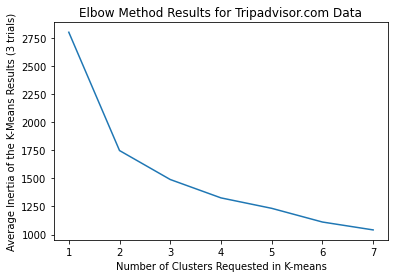

In [42]:
import warnings
warnings.filterwarnings("ignore")

avg_inertia_list=[]
for k in range(1,8):
    print('-----------')
    print('Clusterings with k= '+str(k)+' Clusters')
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))
plt.plot(range(1,8),avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Tripadvisor.com Data')
plt.show()

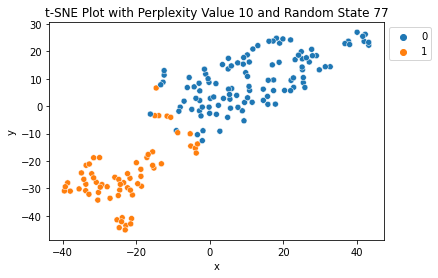

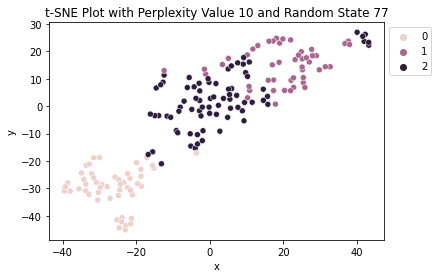

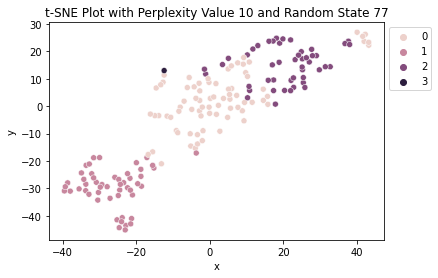

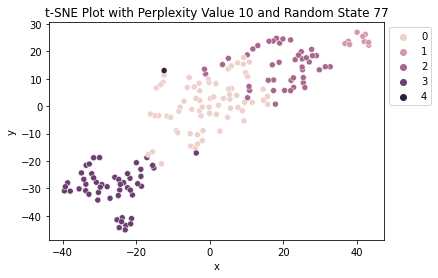

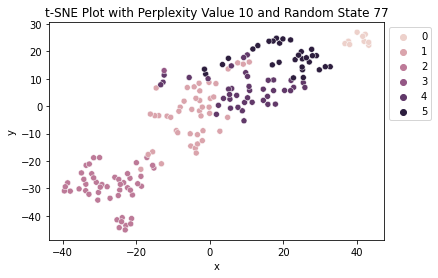

In [57]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=100).fit(X)
    df_combo['k_meanscluster']=kmeans.labels_
    sns.scatterplot(x='x',y='y', hue='k_meanscluster', data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 77))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

In [66]:
kmeans=KMeans(n_clusters=2).fit(X)
df['k_meanscluster'] =kmeans.labels_
df

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,...,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,predicted_cluster,k_meanscluster,silhoutte_scores
33,Canada,2013,11.000000,7.200000,1.610000,83.441000,79.140000,81.238049,1.191184,80.050464,...,50.654490,7.186004,5.049205,0.244165,3.821881,81.293000,1.410386,0,0,0.129559
67,Sao Tome and Principe,2013,34.742000,6.919000,4.145000,68.156000,64.210000,66.134878,2.651021,64.951249,...,4.271709,51.770833,9.062500,0.857526,195.935417,63.265000,3.707378,1,1,0.124308
101,Lao PDR,2013,27.272000,6.092000,3.108000,69.195000,66.483000,67.805927,1.891325,64.702256,...,6.771166,10.697574,6.282496,0.179355,28.794744,35.368000,5.097592,0,1,0.130734
135,Arab World,2013,25.853504,5.947998,3.233402,71.898085,68.126502,69.949702,2.063874,105.040566,...,9.574076,38.312828,4.305996,1.369418,26.610084,57.053106,2.592937,0,0,0.322291
169,Latin America & Caribbean (all income levels),2013,18.043066,5.890156,2.183411,77.836767,71.593453,74.638654,1.127505,109.435113,...,18.110476,37.377695,8.370902,-0.192879,30.364071,78.981328,1.484795,0,0,0.168554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,High income: nonOECD,2013,13.821535,9.970351,1.765720,77.329525,68.917341,73.442825,0.758121,149.317712,...,31.806157,20.818122,6.554736,0.141454,12.591190,77.141281,0.996497,0,0,0.042345
6323,Greece,2013,9.000000,10.500000,1.340000,83.400000,78.000000,80.634146,-0.274055,120.096302,...,49.090968,63.304888,19.705198,-1.788609,86.057184,77.000000,0.182830,2,0,0.367576
6357,Paraguay,2013,23.922000,5.677000,2.897000,74.473000,70.023000,72.193732,1.723422,101.590194,...,6.145743,54.115278,11.099924,1.174495,16.832019,58.940000,2.107615,0,0,0.351122
6391,Botswana,2013,23.807000,17.145000,2.665000,46.268000,47.679000,46.990707,0.862480,153.785649,...,8.008743,45.677836,0.502885,0.328065,3.535917,56.699000,1.272544,1,1,0.211791


In [52]:
from pyclustertend import hopkins
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.15075878339226587, 0.18873796370253235, 0.14410338524444297, 0.14841131453879416, 0.15608091794798942]


In [53]:
def show_silhouette_plots(X,cluster_labels):

    # This package allows us to use "color maps" in our visualizations
    import matplotlib.cm as cm
    
    #How many clusters in your clustering?
    n_clusters=len(np.unique(cluster_labels))    

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient fcan range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
    

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()
    
    return

For n_clusters = 2 The average silhouette_score is : 0.350156844666243


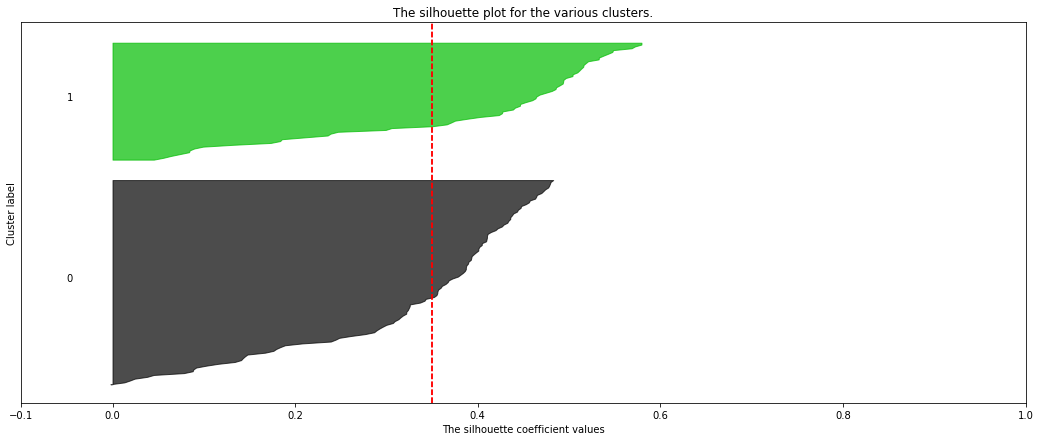

In [67]:
cluster_labels=kmeans.labels_
show_silhouette_plots(X, cluster_labels)

In [68]:
df['silhoutte_scores'] = silhouette_samples(X, cluster_labels)

df.head()

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,...,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,predicted_cluster,k_meanscluster,silhoutte_scores
33,Canada,2013,11.000000,7.200000,1.610000,83.441000,79.140000,81.238049,1.191184,80.050464,...,50.654490,7.186004,5.049205,0.244165,3.821881,81.293000,1.410386,0,0,0.444003
67,Sao Tome and Principe,2013,34.742000,6.919000,4.145000,68.156000,64.210000,66.134878,2.651021,64.951249,...,4.271709,51.770833,9.062500,0.857526,195.935417,63.265000,3.707378,1,1,0.299162
101,Lao PDR,2013,27.272000,6.092000,3.108000,69.195000,66.483000,67.805927,1.891325,64.702256,...,6.771166,10.697574,6.282496,0.179355,28.794744,35.368000,5.097592,0,1,0.132373
135,Arab World,2013,25.853504,5.947998,3.233402,71.898085,68.126502,69.949702,2.063874,105.040566,...,9.574076,38.312828,4.305996,1.369418,26.610084,57.053106,2.592937,0,0,0.078193
169,Latin America & Caribbean (all income levels),2013,18.043066,5.890156,2.183411,77.836767,71.593453,74.638654,1.127505,109.435113,...,18.110476,37.377695,8.370902,-0.192879,30.364071,78.981328,1.484795,0,0,0.442936


In [69]:
df.sort_values(by=['silhoutte_scores'], ascending=False)

,Country,Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,...,Data.Infrastructure.Telephone Lines per 100 People,Data.Rural Development.Agricultural Land Percent,Data.Rural Development.Arable Land Percent,Data.Rural Development.Rural Population Growth,Data.Urban Development.Population Density,Data.Urban Development.Urban Population Percent,Data.Urban Development.Urban Population Percent Growth,predicted_cluster,k_meanscluster,silhoutte_scores
5201,Sub-Saharan Africa (developing only),2013,37.979022,11.380278,5.110781,57.632572,55.317518,56.441999,2.709936,59.715740,...,1.312321,44.141443,9.072339,1.919901,38.638887,36.149654,4.135696,1,1,0.579294
5575,Sub-Saharan Africa (all income levels),2013,37.977279,11.381994,5.110646,57.629799,55.314101,56.438908,2.710037,59.722469,...,1.312892,44.101043,9.066645,1.920434,38.624172,36.152329,4.134832,1,1,0.579274
679,Guinea,2013,37.343000,11.648000,5.001000,56.636000,55.091000,55.844659,2.562786,48.769250,...,0.000000,58.603288,12.209018,1.863312,46.602934,35.748000,3.832425,1,1,0.572170
6425,Heavily indebted poor countries (HIPC),2013,37.924698,10.407943,5.109213,59.585337,56.962692,58.240852,2.698148,51.991804,...,1.086583,39.676293,8.431096,2.025869,33.206907,33.125161,4.082743,1,1,0.568482
509,Burkina Faso,2013,41.411000,11.361000,5.693000,56.470000,55.283000,55.862024,2.864602,60.607652,...,0.858790,44.115497,21.929825,1.713713,60.161334,27.346000,5.988279,1,1,0.548238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Cambodia,2013,25.917000,6.024000,2.894000,74.167000,68.782000,71.408829,1.756269,128.527211,...,3.931981,32.602538,23.226830,1.543624,84.209415,20.137000,2.604093,0,0,0.038103
4283,Philippines,2013,24.590000,6.004000,3.076000,72.072000,65.203000,68.553732,1.724412,105.451099,...,3.612120,41.570245,18.596774,2.100186,324.334319,44.810000,1.263525,0,0,0.024238
441,Bolivia,2013,25.948000,7.152000,3.264000,69.168000,64.792000,66.926634,1.650700,90.443495,...,8.377535,34.630296,3.965660,0.363216,9.689177,67.279000,2.282907,0,0,0.018980
645,Guatemala,2013,31.386000,5.262000,3.844000,75.282000,68.218000,71.663854,2.526220,137.819485,...,11.561768,41.330720,14.315043,1.632427,140.750569,50.212000,3.420424,0,0,0.012932


In [70]:
silhouette_score(X, cluster_labels)

0.350156844666243

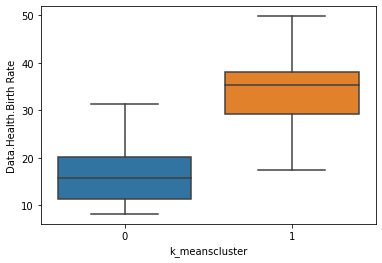

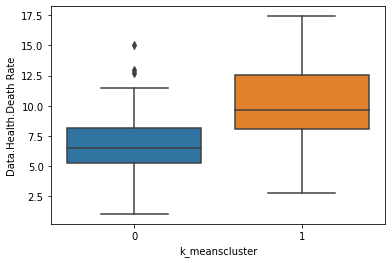

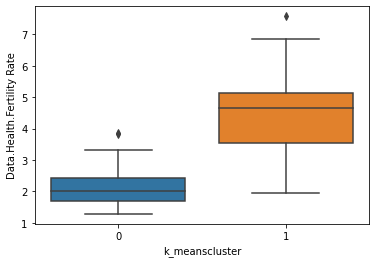

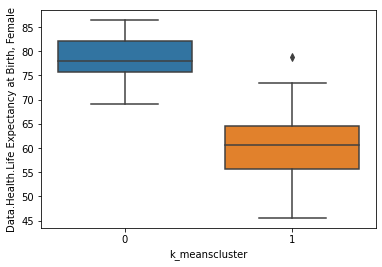

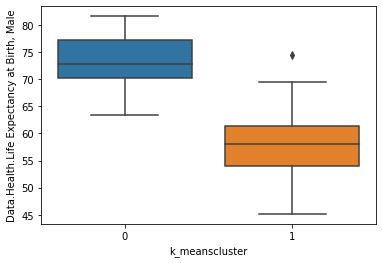

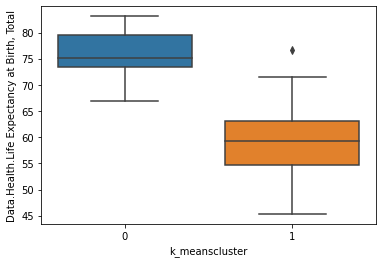

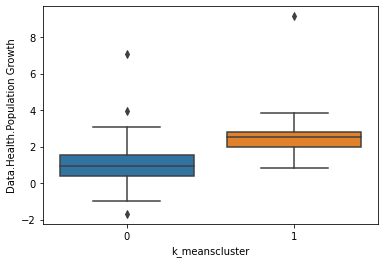

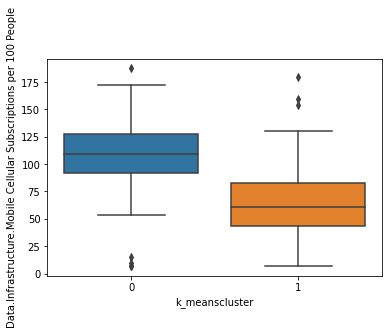

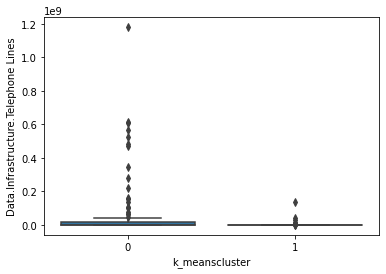

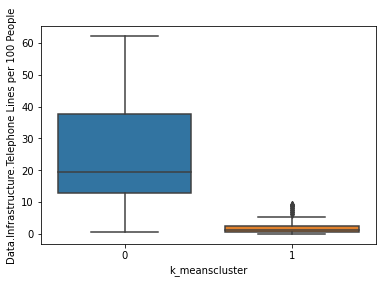

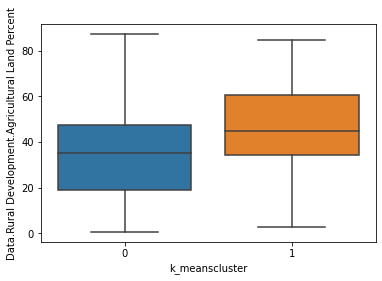

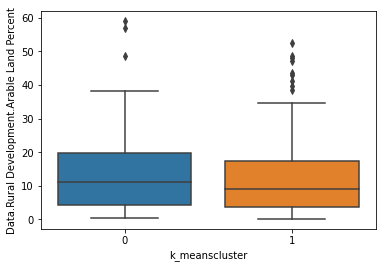

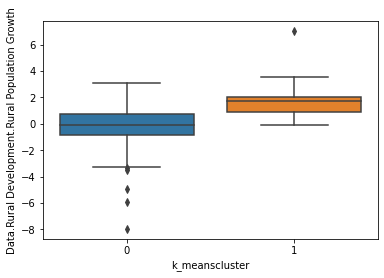

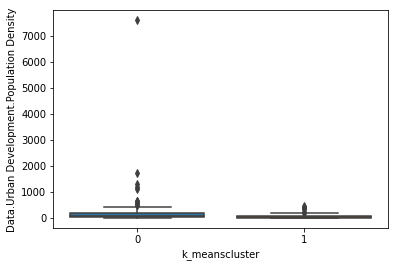

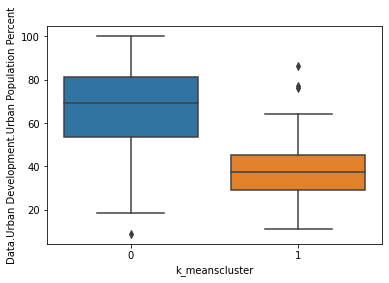

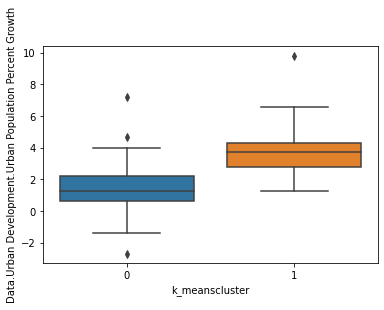

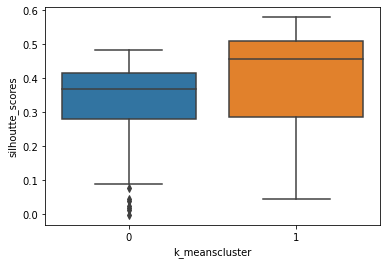

In [71]:
for col in df.columns:
    if col == 'Country':
        continue
    if col == 'Year':
        continue
    if col == 'predicted_cluster':
        continue
    if col == 'k_meanscluster':
        continue
    sns.boxplot(x="k_meanscluster", y=col, data=df)
    plt.show()